In [128]:
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.visualization import astropy_mpl_style
from numpy.polynomial.polynomial import polyfit
from scipy.optimize import curve_fit
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from scipy import optimize
import pandas as pd
import math
import statistics
from scipy.ndimage import gaussian_filter1d 
import csv
import sys
from lmfit import Model
from scipy.signal import medfilt 
import sympy as sym

In [192]:
path='/mnt/data/sarath/UNAB-PHD/Semester-1/Project-lensed Quasars/new lenses/Spectra for plotting/'


In [3]:
emission_lines=[1215.67,1393.,1240.81,1549.48,1640.42,1908.734,2800.315188621943,3727.0917225096655,
                3729.87544376128,3869.8567959162406,3890.151079071683,3971.1231883143773,4102.891635399645,
                4341.684323950415,4364.435312373618,4686.991466008997,4862.683021040764,4960.294931825264,
                5008.239669615672,5413.024467154929,5578.887753538833,5756.186156709958,5877.308574906249,
                6302.046448389282,6313.80560491733,6365.535493114148,6549.859008201306,6564.613973710928,
                6585.26852522626,6718.294291949573,6732.678160576219,7137.75719911729]
    

In [4]:
def gauss4(x,c,a,ga,gb,gc,ga1,gb1,gc1,ga2,gb2,gc2,ga3,gb3,gc3):
    return ( c+a*x+ga*np.exp(-((x-gb)/gc)**2 )+ga1*np.exp(-((x-gb1)/gc1)**2)+ga2*np.exp(-((x-gb2)/gc2)**2 )
           +ga3*np.exp(-((x-gb3)/gc3)**2 ))
def gauss3(x,c,a,ga,gb,gc,ga1,gb1,gc1,ga2,gb2,gc2):
    return ( c+a*x+ga*np.exp(-((x-gb)/gc)**2 )+ga1*np.exp(-((x-gb1)/gc1)**2)
            +ga2*np.exp(-((x-gb2)/gc2)**2 ))
def gauss2(x,c,a,ga,gb,gc,ga1,gb1,gc1):
    return ( c+a*x+ga*np.exp(-((x-gb)/gc)**2 )+ga1*np.exp(-((x-gb1)/gc1)**2))
def gauss1(x,c,a,ga,gb,gc):
     return ( c+a*x+ga*np.exp(-((x-gb)/gc)**2 ))



In [ ]:
image=source=np.load(path+'J0152-2448.npy',allow_pickle=True)  
x=wavelength=source[2]
z=1.32


x2=x/(z+1)
flux=source[0]
y=bright_flux=flux1=flux[0]
faint_flux=flux2=flux[1]

n=len(x)
mean=sum(x*y)/n
gc=sum(y*(x-mean)**2)/n
gc1=gc
med=statistics.median(bright_flux)
plt.figure()
#plt.plot(wavelength/(z+1),flux1,label='redshifted data')
p0=[med,-0.05,10,1549,1,10,2800,1]

plt.plot(x2,flux1)

popt,pcov= curve_fit(gauss,x,y,p0=p0)
a=round(2*np.sqrt(2*np.log(2))*popt[4])
b=round(2*np.sqrt(2*np.log(2))*popt[7])
    
print('FWHM(CIV)=',a)
print('FWHM(MGII)=',b)

plt.ylim(-10000,10000)
#perr = np.sqrt(np.diag(pcov))
plt.plot(x2, gauss(x,*p0),'r', label='guassianfit')
plt.legend()

In [ ]:
spectra='J0329-0208.npy'
z=1.352
source=np.load(path+spectra,allow_pickle=True)  
print(spectra)

wavelength=source[2]
flux=source[0]
bright_flux=flux1=flux[0]
faint_flux=flux2=flux[1]
###BRIGHT SPECTRUM---------------------------------------------------------------------------------------

x=wavelength/(z+1)
y1=flux1
x= np.nan_to_num(x)
y1= np.nan_to_num(y1)
plt.plot(x,y1)
plt.ylim(-1000,2000)

In [ ]:
fig, ax=plt.subplots(2,1,figsize=(10,10))

n=len(x)
mean=sum(x*y1)/n
gc=sum(y1*(x-mean)**2)/n
gc1=gc2=gc3=gc

#y1=gaussian_filter1d(y1,0.1)## This value should be adjusted
med=statistics.median(y1)
  
p0=[med,0,10,1549,1,10,1908,1,10,1240,1,10,1215,1] #change this when : Optimal parameters not found:
                                            #Number of calls to function has reached maxfev = 1800.
    # p0 will be the median
pos=np.where((x > 1600) & (x < 3500))   
popt1,pcov1= curve_fit(gauss,x[pos],y1[pos],p0=p0)

FWHM_CIV=round(2*np.sqrt(2*np.log(2))*popt1[4])
FWHM_CIII=round(2*np.sqrt(2*np.log(2))*popt1[7])
FWHM_MGII=round(2*np.sqrt(2*np.log(2))*popt1[10])

CIV_low=(popt1[0]+popt1[1]*popt1[3])
CIV_high=(gauss(popt1[3],*popt1))    
CIV_dif=CIV_high-CIV_low

CIII_low=CIV_low=(popt1[0]+popt1[1]*popt1[6])
CIII_high=(gauss(popt1[6],*popt1))    
CIII_dif=CIII_high-CIII_low
MGII_low=(popt1[0]+popt1[1]*popt1[9])
MGII_high=(gauss(popt1[9],*popt1))    
MGII_dif=MGII_high-MGII_low
    #print('MGII_dif=',MGII_dif)
               

    #print('CIV_dif=',CIV_dif)
value=[name[i],CIV_dif,CIII_dif,MGII_dif,FWHM_CIV,FWHM_CIII,FWHM_MGII]
print(value)
with open('CSVFILE_bright.txt', 'a', newline='',) as f_object:
    writer_object = csv.writer(f_object)
    writer_object.writerow(value)  
    f_object.close()
    
perr1 = np.sqrt(np.diag(pcov1))
ax[0].plot(x,y1,label='redshifted data')
ax[0].plot(x, gauss(x, *popt1),'r', label='guassianfit')
#plt.ylim(-500,600)    
ax[0].set_xlabel('Wavelength')
ax[0].set_ylabel('Flux') 
ax[0].set_ylim(-5000,5000)
ax[0].legend()
##FAINT FLUX---------------------------------------------------------------------
x=wavelength/(z+1)
y2=flux2
x= np.nan_to_num(x)
y2= np.nan_to_num(y2)

n=len(x)
mean=sum(x*y2)/n
gc=sum(y2*(x-mean)**2)/n
gc1=gc2=gc3=gc
#y2=gaussian_filter1d(y2,0.1)## This value should be adjusted
med=statistics.median(y2)
    
p1=[med,0,10,1549,1,10,1908,1,10,1240,1,10,1215,1] #change this when : Optimal parameters not found:
                                            #Number of calls to function has reached maxfev = 1800.
    # p0 will be the median
popt2,pcov2= curve_fit(gauss,x[pos],y2[pos],p0=p1)
FWHM_CIV=round(2*np.sqrt(2*np.log(2))*popt2[4])
FWHM_CIII=round(2*np.sqrt(2*np.log(2))*popt2[7])
FWHM_MGII=round(2*np.sqrt(2*np.log(2))*popt2[10])

CIV_low=(popt2[0]+popt2[1]*popt2[3])
CIV_high=(gauss(popt2[3],*popt2))    
CIV_dif=CIV_high-CIV_low

CIII_low=CIV_low=(popt2[0]+popt2[1]*popt2[6])
CIII_high=(gauss(popt2[6],*popt2))    
CIII_dif=CIII_high-CIII_low
MGII_low=(popt2[0]+popt2[1]*popt2[9])
MGII_high=(gauss(popt2[9],*popt2))    
MGII_dif=MGII_high-MGII_low
    #print('MGII_dif=',MGII_dif)
               

    #print('CIV_dif=',CIV_dif)
value1=[name[i],CIV_dif,CIII_dif,MGII_dif,FWHM_CIV,FWHM_CIII,FWHM_MGII]
print(value1)
with open('CSVFILE_faint.txt', 'a', newline='',) as f_object:
    writer_object = csv.writer(f_object)
    writer_object.writerow(value1)  
    f_object.close()
    
perr2 = np.sqrt(np.diag(pcov2))
ax[1].plot(x,y2,label='redshifted data')
ax[1].plot(x, gauss(x, *popt2),'r', label='guassianfit')
#plt.ylim(-500,600)    
ax[1].set_xlabel('Wavelength')
ax[1].set_ylabel('Flux')     
ax[1].set_ylim(-1000,1000)
ax[1].legend()
plt.savefig(path+name[i]+'.png')
plt.show()
plt.clf()

In [8]:
DF=pd.read_csv('NTT.csv',header=0)
a=path+DF.Spectra[0]



J0416+7428.npy
0.9
['J0416+7428', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29.710940189402493, 162.0307733312552, 114.69685608829744, 4.794920461736824, 118, 55.53528762855907, 1919.9999999999998, 105.6344469826738, -110.47067005534996, 315.8709811571434, 132.81066214725115, 9.343433562110954, 118, 37.819390530122966, 1919.9999999999998, 71.93748733770212, 10.8434722858167, -1.6561029844036796, 0.2706798405192932, 0.07067389540494498, 0, 0.0, 1919.9632510536749, 1.2223752761094598e-16, 248.00155658271098, 9.250150235599314, 139.80740155579926, 5.448040601876979, 118, 3.981076705031907, 2794.1764011864325, 2.602788392225832, 815.1644714017193, 18.372744767013977, 584.8747420694841, 7281.740603703555, 118, 3.682582800624947, 2797.6673754255125, 2.602788392225832, 9.057712755676876, 0.013258469697232685, 0.25510523667395596, 2.9760605436271845, 2, 0.0349816602503499, 2799.9999836772054, 

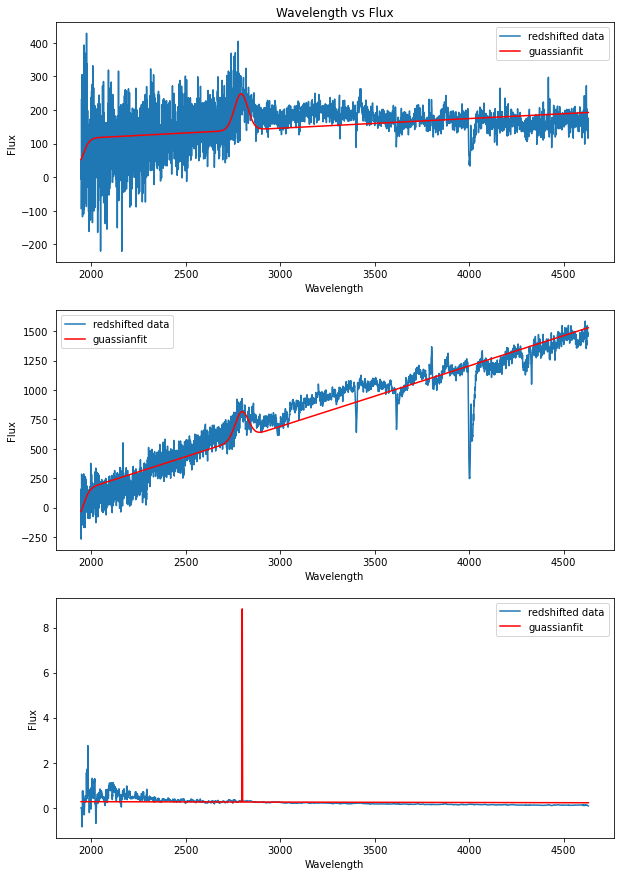

J0440-0905.npy
2.105
['J0440-0905', 1195.8211437515304, 19.77689383883782, 368.8750100615493, 11.460930352117787, 59, 0.6523855767506027, 1218.2623555491034, 0.40684642219160005, 737.6158545604394, 15.860434254414054, 198.28164839579978, 16.580475799638982, 46, 0.6054677917661279, 1217.250441054498, 0.39459445616088024, 1.6953671864562698, 0.043977967835378697, 2.0077849887980057, 0.1659559469587702, 58, 6.2088923420677435, 1210.4796618457958, 3.8998120511514527, 537.0653315798008, 21.67029160330391, 305.27468625600403, 12.310838454762864, 47, 1.7958654135894523, 1545.847555473089, 1.2439037876258474, 352.7981266393466, 18.350724722962365, 171.75471252860228, 9.083763242197454, 33, 1.444624761635512, 1544.964302088278, 1.007591027482501, 1.5981482307506383, 0.10021348276117203, 1.82615145490076, 0.11821183123879851, 28, 4.172373699292514, 1543.210134359433, 2.9169804820480043, 326.6331900044287, 24.611489848530383, 235.5497704200685, 13.424935564987653, 36, 4.0684495885307745, 1904.978

<Figure size 432x288 with 0 Axes>

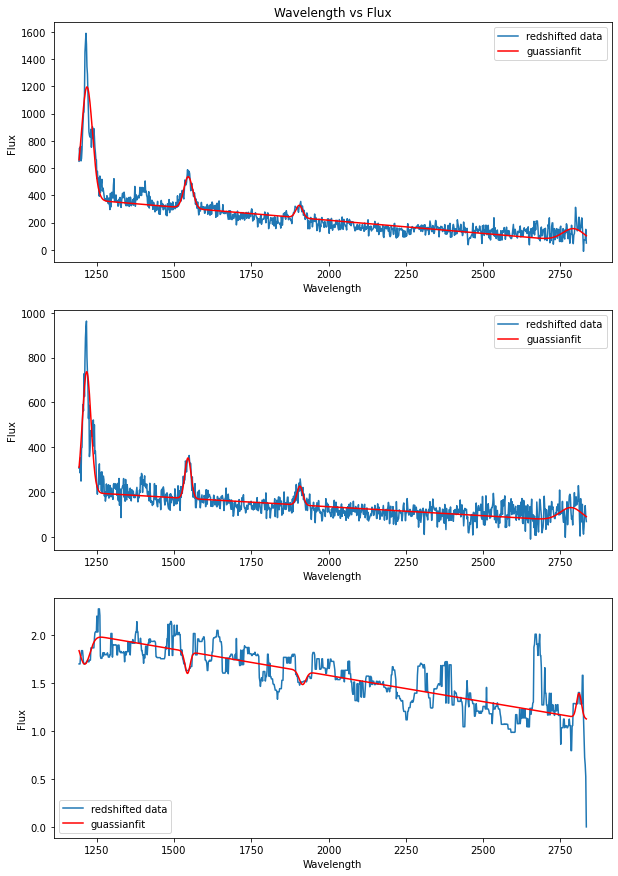

J0504-2446.npy
0.771
['J0504-2446', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 935.7280391312635, 14.87793909334003, 556.8249915395215, 9.260009346736126, 118, 1.8040389968352952, 2798.121559647458, 1.8841316264891912, 399.8426994983296, 15.02826871189108, 198.8928069871751, 8.504571330550709, 118, 2.713611325440308, 2799.487596270505, 1.8841316264891912, 2.034455811887761, 0.09550565453914603, 2.569705016721577, 0.12844563410269433, 10, 2.025203598622993, 2800.1767849301514, 1.429275070229767]


<Figure size 432x288 with 0 Axes>

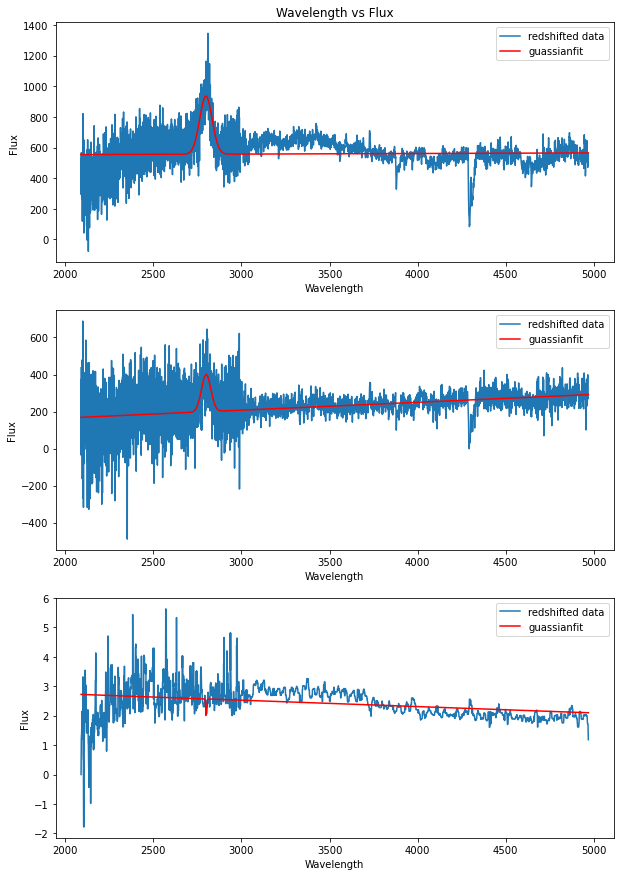

J0544+4350.npy
3.11


/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


['J0544+4350', 119.9395671161704, 4.651033511369886, 91.97218270561098, 4.651002202884894, 0, 55591459.77985004, 1217.9954458486561, 3970833.374113141, 301.2517888568673, 8.41555712900028, 107.47521274954832, 5.170898913043367, 44, 0.7581021696694149, 1229.9999999999998, 0.5243512123476639, 0.1955095864046058, 0.01902798345445257, 0.723377736607471, 0.059731901086727664, 13, 0.5212472367225415, 1215.1434619934032, 0.3664772726751152, 154.6214551506556, 7.58879329095572, 108.07986030831962, 5.2175280388057015, 118, 6.953536286962358, 1546.919717340341, 4.79521840436807, 215.93751558109992, 8.255095194898708, 130.53050760052162, 5.7732894445445515, 118, 4.0656731251187015, 1546.760527923544, 2.795063886591515, 0.6175117276863518, 0.04454649494015009, 0.77224842030384, 0.05421181671693364, 36, 4.172373699292514, 1544.3955557280833, 3.0407765416952937, 149.16932000224878, 12.289698080418347, 126.14499925788719, 5.922438913432579, 31, 7.1692422986932565, 1915.816017287601, 4.983254930290873

<Figure size 432x288 with 0 Axes>

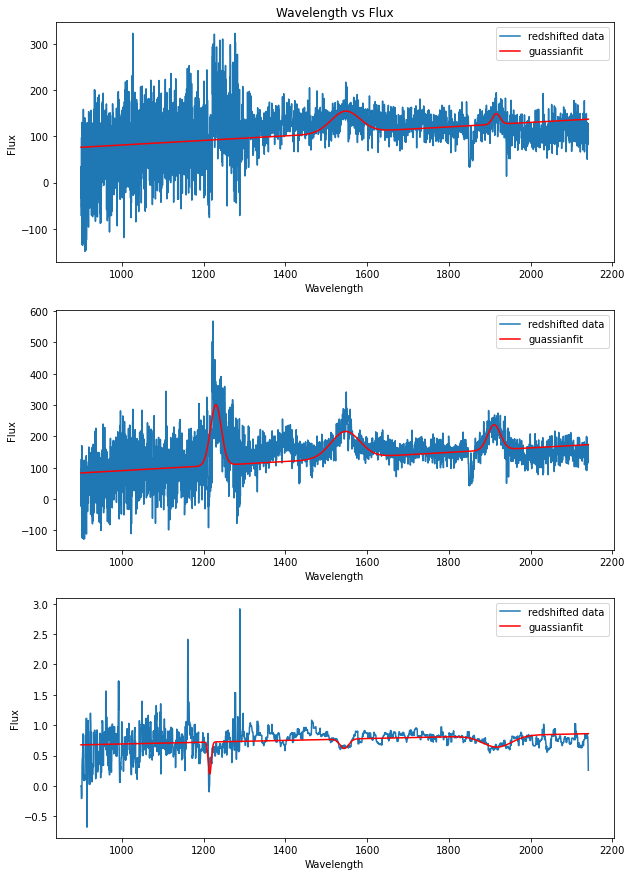

J0635+6452.npy
1.845
['J0635+6452', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1177.6372259256473, 11.135868563152535, 791.4137092031278, 7.187836610694935, 72, 0.8031593430461483, 1547.0263788913294, 0.5456951462148839, 147.30408664218635, 6.695065697133015, 89.18815710146569, 3.6042438913055372, 44, 2.1147419330192876, 1544.1472275219344, 1.463752313046818, 9.544421215100037, 0.37114055870249046, 8.468183544939501, 0.3675389796246151, 3, 1.2290290818194303, 1544.5807501988295, 0.8677197826821209, 842.5101683770026, 14.017154605186079, 695.3662691545007, 7.800937570605834, 78, 3.010613990565565, 1899.6818576809396, 2.1277537953331667, 209.85267469040645, 3.9308535047251127, 124.11326452762225, 3.9308535047101696, 0, 0.054259493167953386, 1909.8657909884043, 0.03593488026557561, 7.522246147815605, 0.10058347476026772, 6.49171705065034, 0.18824802895997952, 10, 1.2290290818194303, 1919.9999999999998, 2.1941846357879204, 679.2994642472053, 13.832383284176906,

<Figure size 432x288 with 0 Axes>

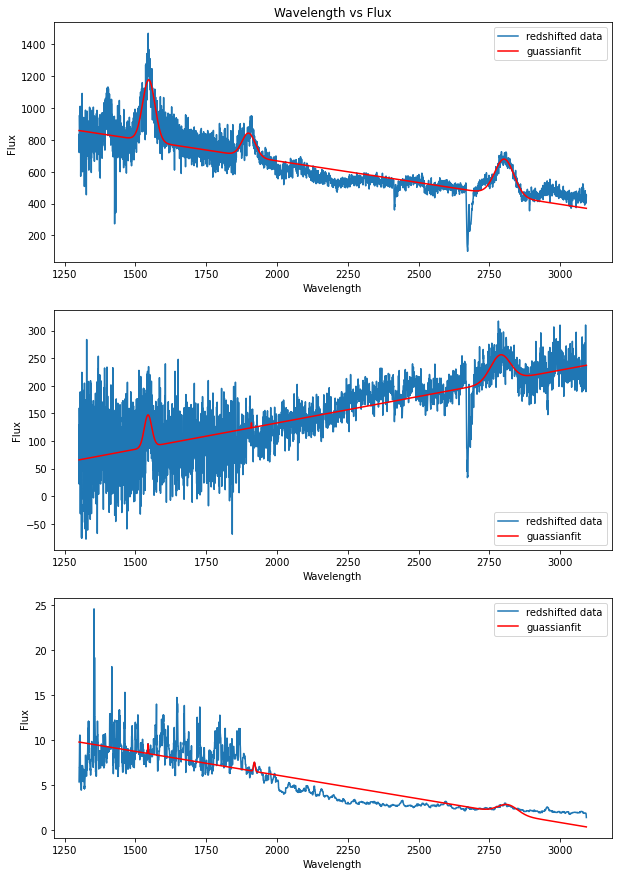

J0643+2725.npy
1.562
['J0643+2725', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1238.0344111206339, 6.58281821645918, 165.04487240414045, 6.58281821645918, 0, 3.0554063761753483e-15, 1536.876024185855, 3.656176957930271e-15, 179.56941550673514, 30.793129694408794, 91.64447205233584, 4.336596632114798, 3, 0.47316718535379065, 1555.4702240077613, 0.3340105291330481, 1.1585040252886851, 1.182852193580284, 1.6326289271553327, 0.1114535326440839, 2, 0.7153347723382971, 1548.975582641134, 0.5051770067699296, 385.9594170468097, 10.395692650592796, 302.6218725801469, 7.099902719958262, 107, 4.891289959881363, 1912.5812151844273, 3.3357077596373785, 205.6372958785318, 7.106620293321423, 129.20342694707142, 4.6524441665026295, 92, 3.231713578011539, 1903.2049795931343, 2.215104597730212, 1.84884667763916, 0.08223712952530567, 1.9642493491589663, 0.10066221045967691, 35, 0.7153347723382971, 1908.8702684829534, 8.13207466450658, 710.3657632408241, 13.479222514320238, 62

<Figure size 432x288 with 0 Axes>

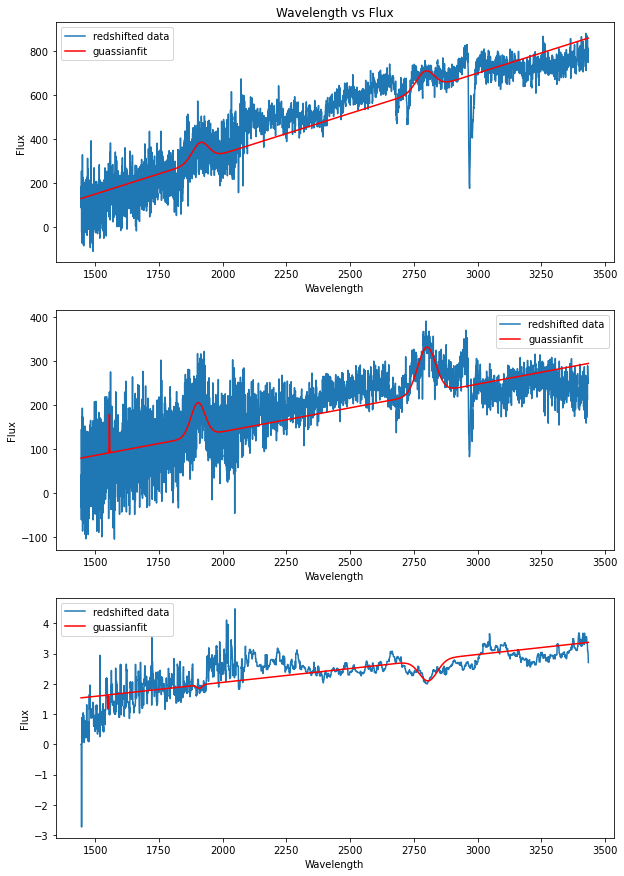

J0740+0635.npy
1.78
['J0740+0635', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 413.7545285310317, 12.426512099187166, 160.56584580407426, 5.381872428439502, 29, 0.6366920850310596, 1548.4814811796557, 0.443712751725543, 784.9456806281135, 19.452651667820763, 416.8599377815742, 8.93692705721434, 33, 0.7757071589634404, 1550.047866517585, 0.539220812574727, 0.5404816894556407, 0.020524706574619033, 0.39339992809996, 0.01532551379007617, 25, 1.1132265256461626, 1544.9170904750772, 0.7773665214508182, 268.86381880052886, 14.54168049930326, 185.25365284621088, 5.8398434423524295, 38, 2.7107236103682526, 1912.6049502912806, 1.908032384133555, 714.6584037524087, 19.588136993726398, 514.6545218044428, 9.682309228450213, 52, 2.147325206555717, 1909.1793384607709, 1.5358426784659416, 0.31349234936297116, 0.022811414728325454, 0.3718050298819223, 0.013214249264891757, 27, 1.1132265256461626, 1895.0000000000002, 2.126326778435632, 347.8275412945064, 16.962489885342098, 

<Figure size 432x288 with 0 Axes>

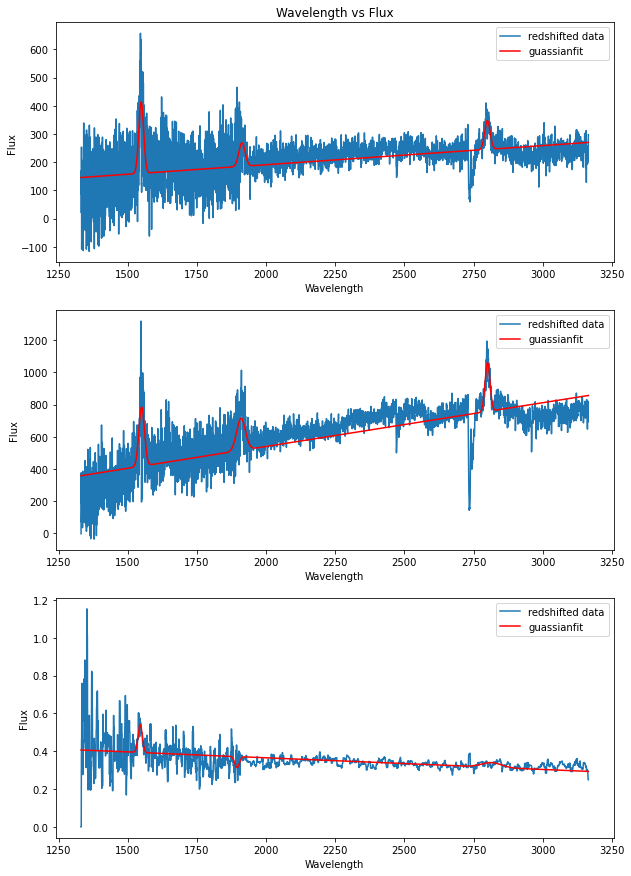

J0826+7002.npy
1.618


/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


['J0826+7002', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 458.56120288374024, 9.595458301487893, 296.35295412590074, 7.052110583965928, 116, 2.43796516864606, 1555.2815277679501, 1.5623345160536029, 2094.2725801673337, 19.78785835595451, 1416.5103090813768, 14.006983052950606, 102, 1.0952832091536226, 1554.4563733478055, 0.7108566572439593, 0.2514653932370824, 0.005027195624590418, 0.21235845374216655, 0.005391234822722335, 12, 0.7078258555135978, 1547.1124762919187, 0.49727509500158384, 324.0845396207374, 10.821294594599006, 269.18326970641925, 7.533770020187632, 78, 5.586995516666605, 1895.0000000000002, 3.79962774261063, 1606.4164310514643, 20.68161766820118, 1313.0329887458483, 14.975828161465957, 96, 2.359648715203406, 1898.9516036817922, 1.5937826287609707, 0.18706290791510072, 0.007219679495292795, 0.20518259704040134, 0.006195834239848823, 9, 0.7078258555135978, 1914.1581733368407, 0.9237387639348591, 299.07364224130697, 13.65729846729881, 196.41130

<Figure size 432x288 with 0 Axes>

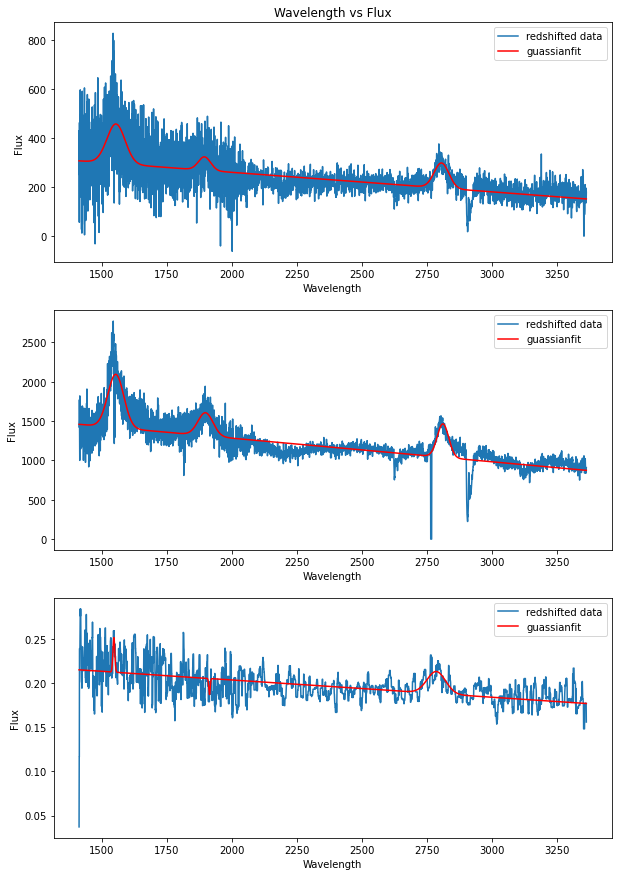

J0833+0331.npy
1.845


/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


['J0833+0331', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 181.18603315218817, 8.593346043066623, 69.06027876216552, 3.979011172231863, 31, 1.0416209947056014, 1548.8369240494476, 0.7255624331292887, 373.69013305993906, 8.58507394321683, 161.08458913122112, 4.524551390094403, 44, 0.7550115610558473, 1550.9853774327466, 0.522215977014645, 0.5161352459920164, 0.025551691959154008, 0.4181241011021827, 0.02748028293515842, 8, 1.5280291481653163, 1551.0632339870774, 1.076231410254422, 98.92833549002921, 8.954206926384012, 68.49711880031589, 4.326040493902413, 60, 7.647133057442077, 1905.3392475075266, 5.363225982134819, 246.081171593561, 9.927153660260341, 151.8060104284142, 4.912194060084419, 65, 2.928195075896279, 1907.0880210898213, 2.052101619718525, 0.3841374348142638, 0.03983769611718735, 0.4532149176868314, 0.03201975903368471, 118, 1.5280291481653163, 1907.4389984685072, 8.15108544276006, 106.64751106713929, 8.645985655793513, 67.08588397634288, 5.3432458

<Figure size 432x288 with 0 Axes>

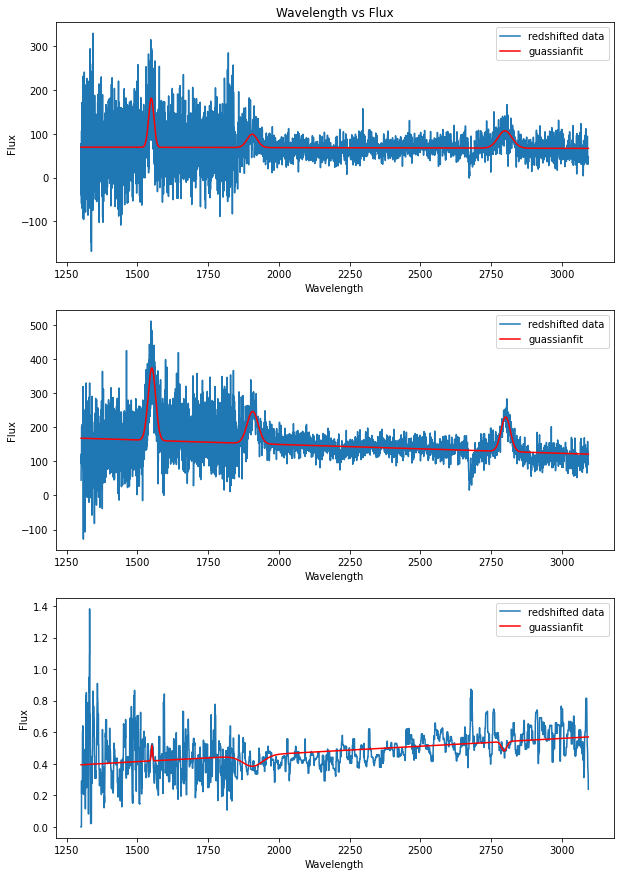

J0834-2933.npy
1.922
['J0834-2933', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 299.5434591735074, 12.686191703398775, 127.65097344047466, 6.008415602188895, 34, 1.0896670008935596, 1545.6093449643283, 0.7581339000330799, 407.882072062553, 11.02124015719449, 182.30345322107635, 5.653059574993786, 42, 0.8706960140060803, 1545.4016535475878, 0.6035925277996729, 0.765202379906856, 0.036893645849545055, 0.6101602981910171, 0.03946772170485851, 118, 8.213038061233865, 1564.9999999999998, 5.43062678534364, 220.46707597273564, 10.814469453236788, 134.0843989794279, 6.537756254379047, 118, 5.822524570957926, 1903.9541074915617, 4.051856976123994, 382.96035286093297, 11.877828102510204, 263.6597845142318, 6.147180786528398, 75, 3.13328737263194, 1901.7294904745888, 2.1934499111723715, 0.6032842767856381, 0.03341061717839286, 0.53146858531684, 0.027485154522636564, 118, 8.213038061233865, 1895.0000000505297, 16.858684706324045, 197.66419603712757, 26.674126092505432, 

<Figure size 432x288 with 0 Axes>

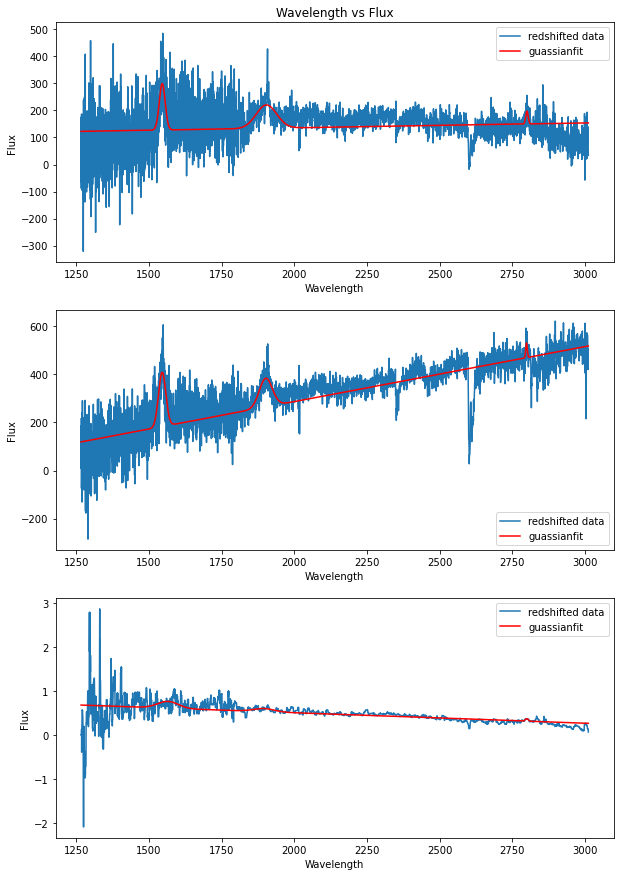

J0904+3343.npy
2.49


/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


['J0904+3343', 233.19566012629804, 20.716541755668185, 89.88559960250836, 4.245812030341444, 5, 0.32488718243396913, 1211.0193792214782, 0.22904760521688725, 353.23436958447786, 8.475253600585296, 103.43052932267463, 5.276319856454495, 59, 0.7912772038477975, 1228.110698214042, 0.535429592879742, 0.4078493511343979, 0.06074950016799822, 0.7249329808486104, 0.06041918489606551, 118, 4.277334377708466, 1200.000000000009, 2.6270158502229863, 162.73862126885084, 9.814210450675445, 127.48128531517654, 4.688234518281552, 53, 6.403556353554533, 1558.0163937613866, 4.524711489245767, 186.28511728514405, 11.122991223737897, 105.44534577289124, 5.748088715110625, 56, 2.9280376159599055, 1539.8887577017945, 2.1721288325409747, 0.7344378602681284, 0.07413824554544451, 1.1058978537798585, 0.07949973593447254, 118, 8.213038061233865, 1535.0000000000045, 2.7878828101335746, 243.51803431375265, 7.83633495550859, 163.9920598164118, 5.173612692814887, 118, 4.340932193568168, 1895.0000000000002, 2.998435

<Figure size 432x288 with 0 Axes>

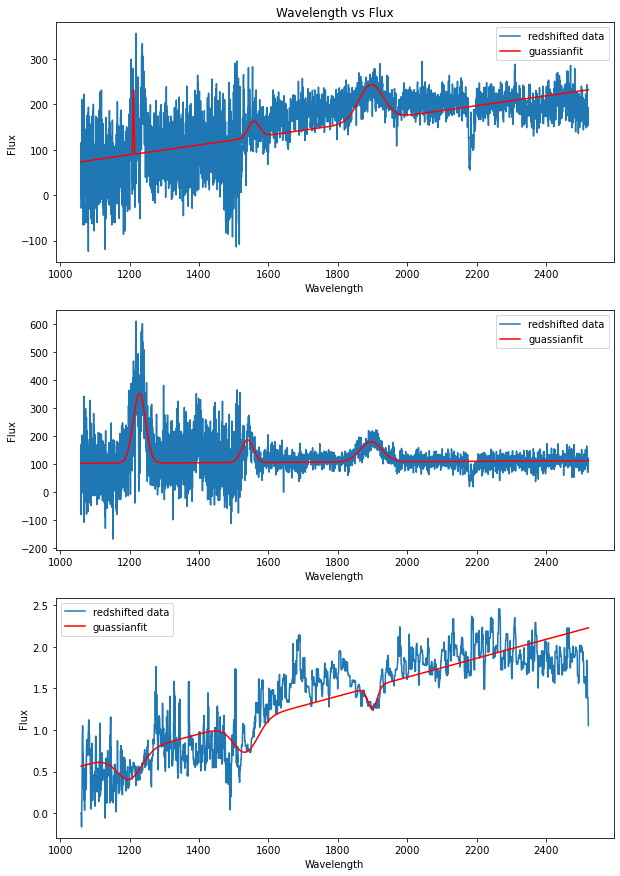

J0907+6224.npy
1.86


/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


['J0907+6224', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 232.5547245706906, 14.170756987718262, 117.49119297079814, 5.192578807372135, 17, 0.9787014777805558, 1552.5021442758257, 0.6863990204420397, 435.8647932934795, 14.777100853848868, 182.24258326075255, 5.4477156018196675, 18, 0.4743488924208128, 1551.0300751166815, 0.33266081580388096, 0.4769217748311738, 0.03720516933274737, 0.6202629510269858, 0.03439812443699156, 54, 2.9270836424772613, 1535.0000000000002, 2.0120080775189986, 176.24478868419658, 9.989015760331702, 157.9265370864852, 5.633506855840567, 89, 18.25318112592852, 1895.0000000000002, 13.555351500927346, 310.4817217029253, 11.450795183450442, 206.73525571212548, 5.925240388686889, 72, 3.3065377337954285, 1903.6898893169785, 2.3436677807129906, 0.5544267593666778, 0.03838445921668578, 0.73948617988735, 0.03495593396786932, 85, 2.9270836424772613, 1917.6944089024992, 2.82521761707882, 307.13121708075545, 10.755073318763879, 263.0000599173651

<Figure size 432x288 with 0 Axes>

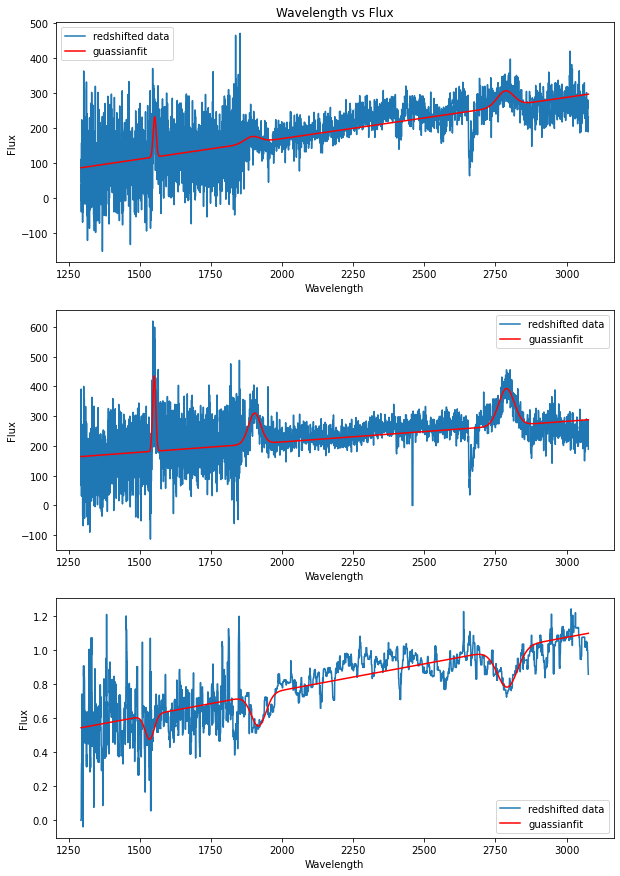

J0921+3020.npy
3.335
['J0921+3020', 191.3174622224406, 6.862459221766859, 54.84302833933159, 4.242313257498365, 59, 1.1621836611437364, 1224.2201930370097, 0.8324674391502531, 1211.8843060524298, 19.13807850881849, 277.0438731980986, 12.17295130222083, 75, 0.5641678747285092, 1229.9999999999998, 0.3934599301521829, 0.14029090198238664, 0.0061871422942871524, 0.19048923502245807, 0.017610703258895195, 118, 9.38525753343794, 1229.9999999999998, 6.503679855853442, 119.02982678298217, 6.658565309427107, 85.15047539544258, 4.768567479936125, 118, 8.108789193047505, 1541.030316803434, 5.5370427408320815, 542.8251008662928, 24.882931402584486, 306.797569184571, 13.66217439840783, 48, 2.0856478749346317, 1546.5582852306732, 1.454765217433895, 0.22843739210801928, 0.015858840150419662, 0.28590635397271874, 0.019858119749787174, 33, 2.9270836424772613, 1549.8949399929065, 3.5194279702659763, 133.4685760687023, 11.086667663952557, 120.23357419637642, 5.439241334771073, 27, 9.870217184243424, 1907

<Figure size 432x288 with 0 Axes>

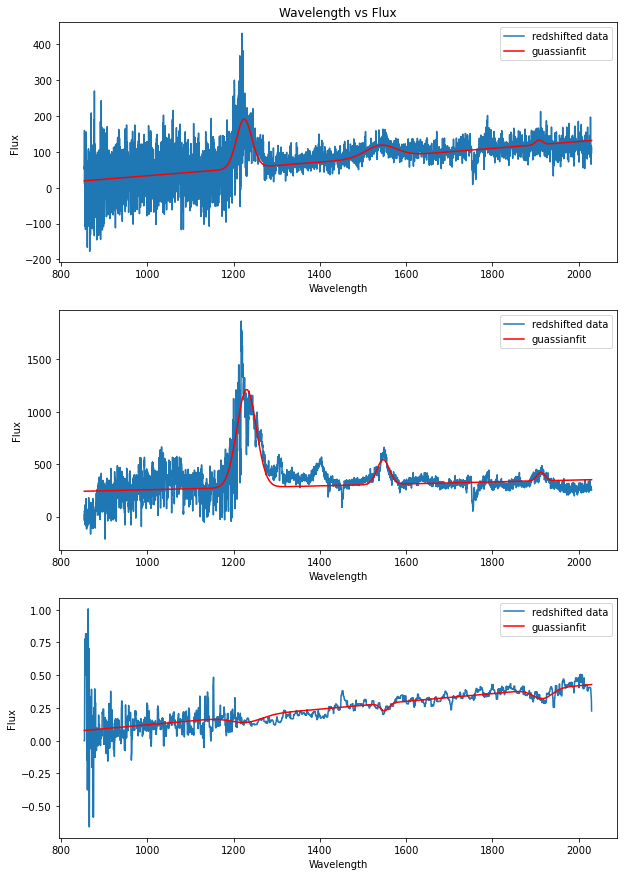

J0924+4235.npy
3.17
['J0924+4235', 225.35749623706, 7.293368265788441, 97.53554235063217, 4.726113509621314, 55, 1.212804496022097, 1225.7817859422053, 0.8224664353629352, 539.6986501017702, 9.592734312485733, 109.86665159504437, 6.49236532025231, 62, 0.5182848621209029, 1223.7255588940675, 0.34888242686138404, 0.4177981783580921, 0.015417716271177025, 0.7715398133598885, 0.06784225382308187, 115, 3.9792289360102573, 1229.9999999999998, 2.650480290661119, 257.00888543413635, 7.614711877526671, 168.26412621421844, 5.31279239763671, 118, 3.619066750018548, 1562.5451439637864, 2.486247060168899, 311.14746865284224, 11.695390616517107, 122.00551281781887, 7.267272993321599, 75, 1.7953474330950765, 1546.4162472401467, 1.2461870652834437, 0.8164683647093066, 0.03953342061033166, 1.3865557644926718, 0.09297702000249244, 87, 2.9270836424772613, 1547.0389640600004, 1.8011097970276193, 273.41265932656, 16.586029452364425, 241.44118801362708, 5.984700451255062, 15, 3.470041101894531, 1910.9665560

<Figure size 432x288 with 0 Axes>

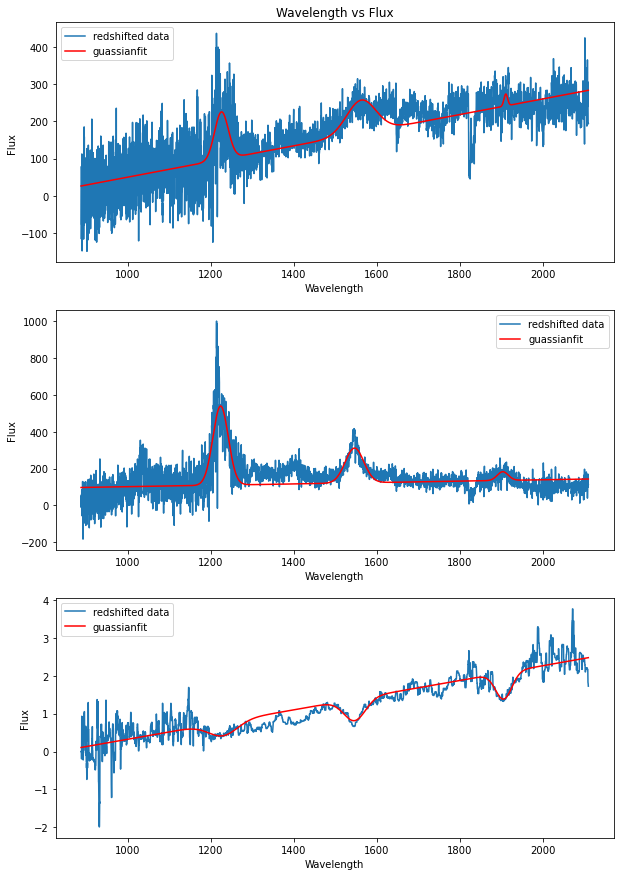

J0937+5835.npy
2.115
['J0937+5835', 890.2506161991101, 19.270775684135128, 126.34511481013087, 4.726113509621314, 8, 0.09907551281243165, 1215.6484119111872, 0.06959138143425857, 792.8832399801715, 20.23590316903999, 95.91651617568287, 6.49236532025231, 7, 0.09610336290040943, 1215.513712393416, 0.0675730605657634, 1.3910324094470874, 0.03757508600884205, 1.0950320820611759, 0.10187011477237003, 30, 2.924109307367988, 1222.1058560995689, 2.019084342949623, 394.14669784034095, 15.324281662852979, 116.02345975663496, 5.6816407713283335, 14, 0.3568215782744892, 1549.9408542603926, 0.25094968619137237, 276.14463109584517, 13.922297181452414, 85.91558366196583, 5.525567152062066, 16, 0.5444547004877552, 1550.694647967067, 0.38254308137202303, 1.4652067743771773, 0.09087296464398113, 1.189077432171194, 0.10916261817362156, 6, 1.3276816443664174, 1544.3949492400707, 0.936658673338068, 187.57492229180994, 6.251248456883171, 104.90638748794379, 6.251248456883122, 0, 0.007706492833833004, 1909.9

<Figure size 432x288 with 0 Axes>

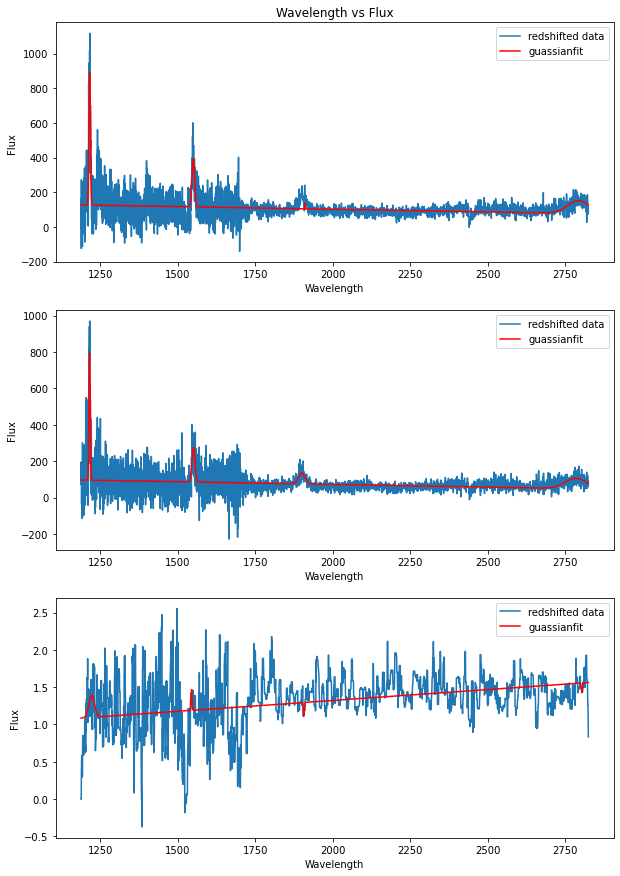

J0954-1421.npy
0.973
['J0954-1421', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 52.68746940511748, 10.63196391686718, 166.72183907461852, 6.572083949155855, 118, 5.387635112763591, 1919.9999999999998, 3.3111404106553173, 35.29711816320327, 10.335882865438151, 66.86488112315247, 6.381685666754977, 118, 18.93316989997477, 1919.9999999999998, 11.63977170851943, 0.1211471611622994, 0.5308314665205214, 1.8071574862803637, 0.2574741549523711, 706, 19.35384645475234, 1919.9999999955555, 16.504231113511384, 326.62754839681935, 13.58019713867603, 142.3703579797998, 7.511770302348149, 118, 3.573249120252189, 2797.880053395322, 8.328440509195087, 117.33594679160106, 14.683728094967819, 70.92115853933839, 23283.645140080982, 88, 11.878644221387074, 2795.678792315491, 8.328440509195087, 2.8843238387986396, 0.3670819891075518, 1.6560151131689063, 659.050830213794, 204, 5.512133765944954, 2814.99999999

<Figure size 432x288 with 0 Axes>

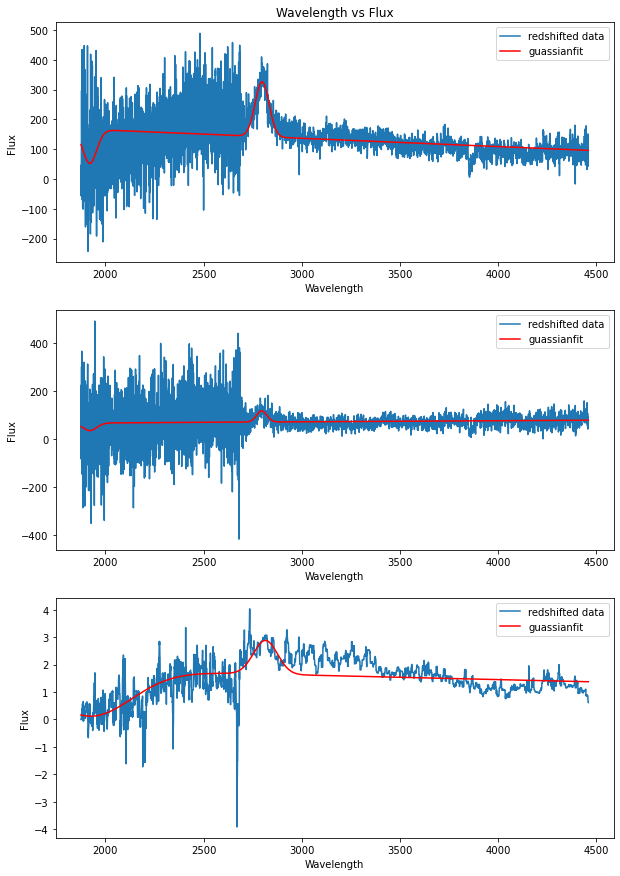

J1003+0651.npy
2.565


/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


['J1003+0651', 130.05039988113043, 26.04760665598443, 327.34226031905393, 20.40527716404551, 118, 5.126996954613424, 1200.0000000000002, 3.2078533425529057, 438.4319506371388, 92.37832580595496, 250.70644049679146, 10.558384924820023, 1, 0.32084022860954836, 1223.2056040935147, 0.2266786099977601, 0.5889082403622669, 0.08623137230298104, 1.1906429411268773, 0.09822526786353301, 118, 2.941012981602948, 1229.9999998429548, 1.8863069448920085, 1296.6634009770864, 31.725291928518494, 662.53173922552, 22.493523254359854, 118, 2.0616700662712253, 1564.9999999999998, 1.4301218050946753, 669.730014914797, 18.191051626142226, 282.7498592258614, 11.624306508047152, 118, 2.023798443937892, 1551.4484464011043, 1.4599695474299461, 1.2993274150727907, 0.07077729855545635, 2.0630136282206015, 0.12493366808535936, 27, 1.3276816443664174, 1548.4197957987055, 1.025243207234153, 1370.3410200968033, 33.4591439271233, 965.579761250545, 24.643656000366914, 118, 3.2925131807330565, 1895.0000000000002, 2.2610

<Figure size 432x288 with 0 Axes>

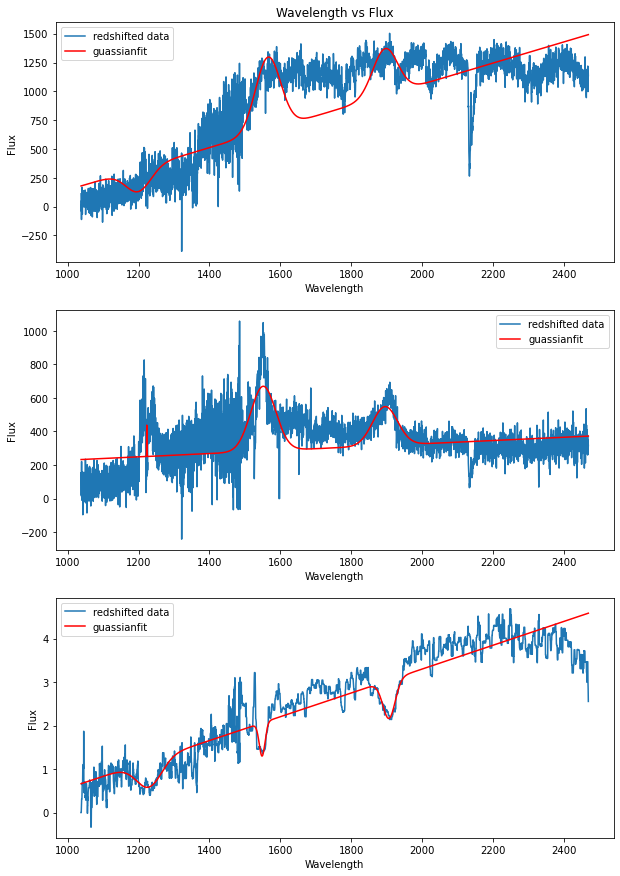

J1008+0046.npy
1.51
['J1008+0046', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 698.8175592613168, 20.201691662061926, 170.50011863194766, 8.831971543548034, 34, 0.5811713370998693, 1546.5394484778476, 0.40237941102121755, 440.9330388834064, 14.230913102455768, 93.11985775143134, 4.783633844044418, 19, 0.36634826234293055, 1548.5832999712213, 0.25616997214762977, 2.3314118036603366, 0.06866932681413115, 1.0797699805027157, 0.13357623942547706, 69, 4.103348118940125, 1548.2156791676957, 2.7722549777925396, 346.0201508045642, 24.179425740163804, 186.76174115259948, 9.478445889831596, 23, 1.5567486247608118, 1907.8194548531487, 1.0922641058505411, 192.1676031872181, 17.530939471870603, 80.13391714454242, 5.1361014528519, 12, 0.9063919701837121, 1908.830327057313, 0.6383865067304912, 4.900019528387984, 0.20691782696419309, 2.097271725610255, 0.19053811163123122, 4, 4.103348118940125, 1917.4685642901213, 0.29565341519602145, 364.4662565740076, 23.299625752508742, 

<Figure size 432x288 with 0 Axes>

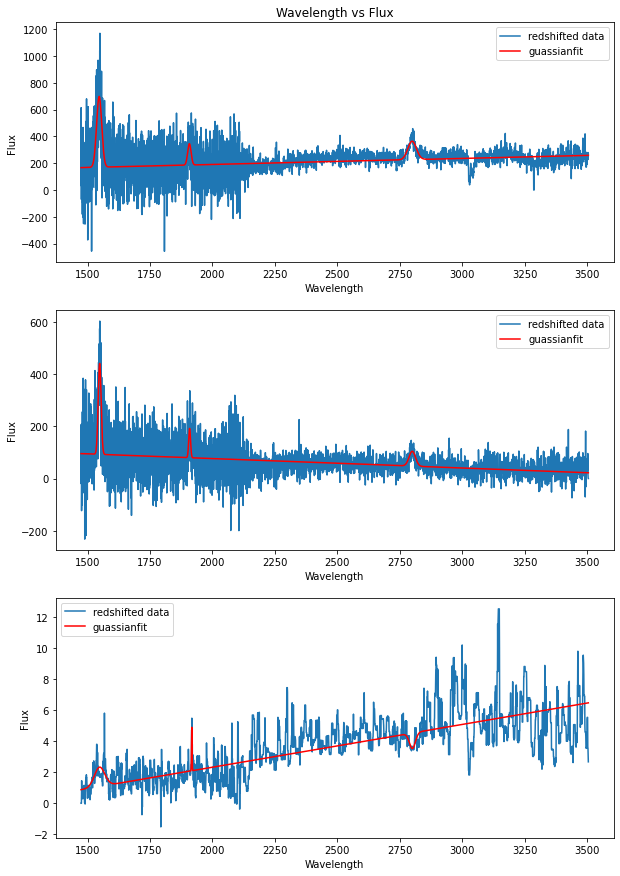

J1008+0929.npy
3.08
['J1008+0929', 681.8234644392828, 75.36845778161664, 371.30325575394403, 11.827549647684634, 2, 0.23112660651635536, 1207.8147159441314, 0.16328253921382324, 151.22017596212183, 22.660485971680277, 97.41105754509842, 6.304711972452747, 6, 1.2792328117339333, 1206.3931149645005, 0.9018318640697249, 4.250430841046614, 0.8395876381382548, 2.852032855310466, 0.2749650756668926, 5, 0.6506148077573092, 1213.9134271854077, 0.45905426387995596, 480.49647232568697, 22.177976009633785, 380.0749593376744, 13.298189251686402, 73, 6.359326976180491, 1545.0603535632345, 4.42892470115228, 150.18427498015186, 12.021062089013391, 124.5771368017463, 7.090054029645807, 68, 12.738036567284007, 1543.8369325993901, 8.87820285736795, 3.3291142282308464, 0.2956120245112774, 2.8177742286199314, 0.20382499327299067, 118, 4.103348118940125, 1535.0000000002742, 9.146620230616737, 497.52225030719217, 25.934989763064767, 389.59437273963044, 15.07270482841363, 52, 5.100564954445575, 1911.05318629

<Figure size 432x288 with 0 Axes>

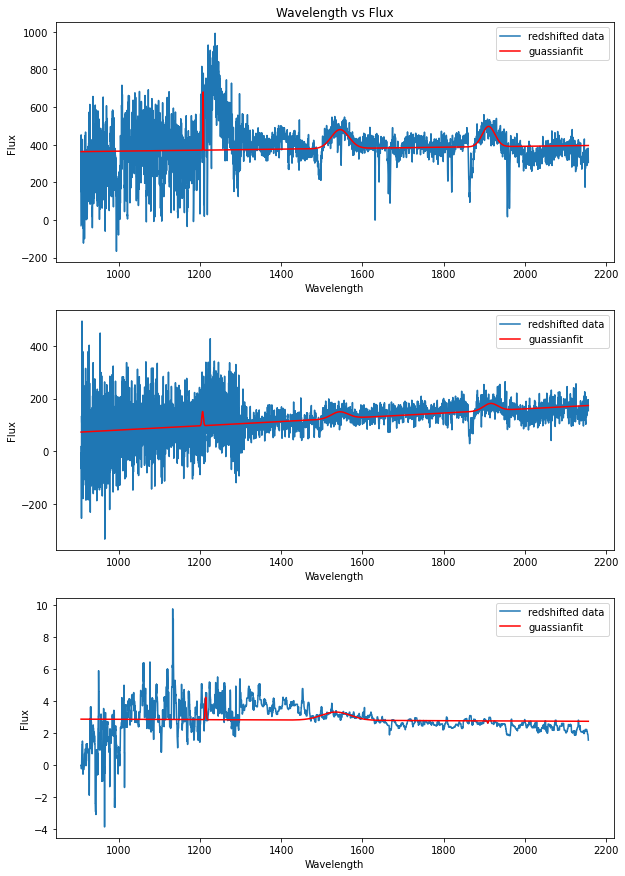

J1025-2246.npy
1.97
['J1025-2246', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 477.3462515438467, 8.12087279561985, 203.66790165658284, 5.0733926428834755, 64, 0.738825138888324, 1548.2574240553026, 0.5066490540096678, 129.20636514489877, 6.588450549319778, 71.52543846521556, 3.979170399423594, 64, 2.9308252318390804, 1544.3617480122473, 2.0103965773286263, 3.751418202703488, 0.1985943426286258, 2.3285147587936956, 0.1735693063129177, 118, 2.0914294219162297, 1564.9999999999998, 1.388573211267269, 294.7725294893288, 9.127238288476262, 182.78546416339253, 5.535128451289511, 100, 3.1987903176301193, 1904.1767970194542, 2.2294566548123926, 103.55232447269648, 9.041126437418239, 80.00466724368638, 4.337364370255372, 58, 9.554578873470833, 1906.1233336104076, 6.703003939384589, 3.2188539804432854, 0.2637028429803057, 2.1197951889368767, 0.1418741911524809, 118, 2.0914294219162297, 1897.003710010218, 2.586379630515281, 216.60581847185423, 11.107753122653477, 129.3

<Figure size 432x288 with 0 Axes>

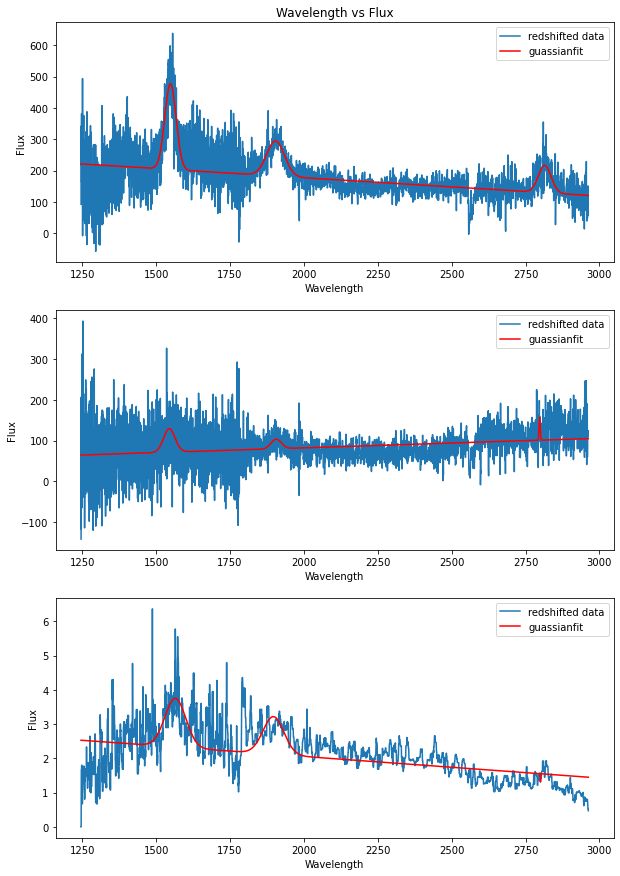

J1206-2543.npy
1.765
['J1206-2543', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 260.55754748542034, 8.726267870492535, 149.10050088672318, 6.082936282354198, 99, 2.8365543382653167, 1564.9999999999998, 1.876609971524995, 487.4016012232957, 14.847068078509661, 206.03443561264191, 6.891876856823688, 33, 0.7728255915240153, 1549.4600064955084, 0.5361824304222444, 0.5608586565805629, 0.024201669045223015, 0.697411219531873, 0.038178890556153235, 11, 2.0283146545861777, 1548.8537129448334, 1.4261827736943677, 249.8268376161082, 8.764961111949539, 138.0724778623857, 6.520343779548412, 118, 3.488927701975924, 1895.0000000000002, 2.4275010921548765, 393.3331564685039, 10.382753247870353, 183.7315840257981, 7.430185129326737, 118, 2.2951201444251725, 1895.0000000000002, 1.6076016198527772, 0.5853327214395786, 0.02788670427472901, 0.754021750134936, 0.04672275575554527, 55, 2.0283146545861777, 1895.0000000000002, 2.676894620539292, 138.07787123883935, 17.0111531533461

<Figure size 432x288 with 0 Axes>

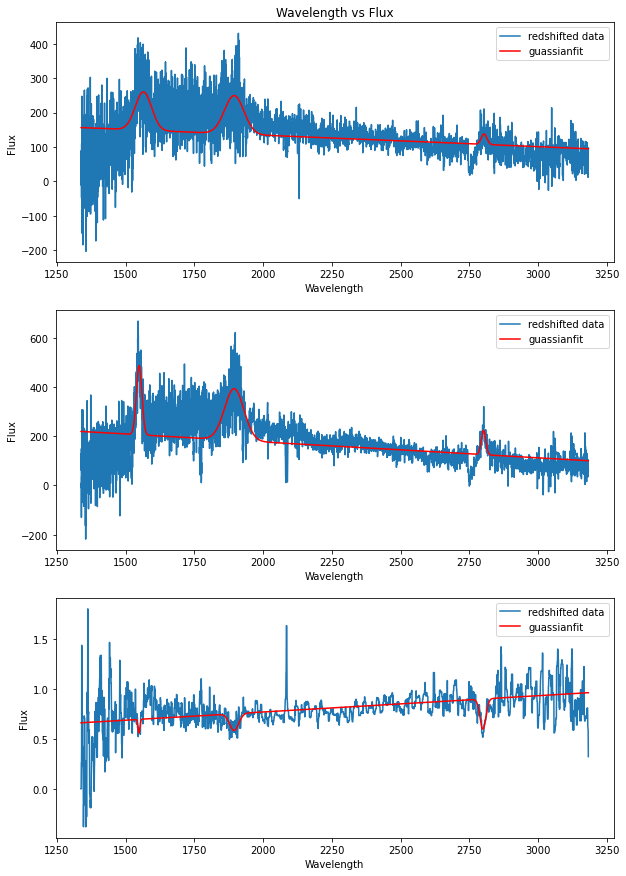

J1209-1929.npy
2.91


/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


['J1209-1929', 296.8506444425092, 12.676475909122393, 84.69630080919477, 8.692704635928017, 71, 1.5518619340184254, 1222.8201132686847, 1.0531674392557082, 724.697446517551, 15.556774766191326, 239.35726177608709, 11.784316113477386, 104, 1.1113897061209403, 1227.7463619965565, 0.7346498218343758, 0.39424988036738473, 0.01957786263399687, 0.22903373959046316, 0.040279141496226085, 118, 4.692612306448023, 1216.3441867510314, 3.0767781887824586, 170.63300056385037, 16.182562431140855, 84.44648159013717, 9.639189563132428, 73, 5.436636505621279, 1546.5155844690041, 3.7880955820968767, 465.0581646822799, 18.7691175969836, 227.22211786688302, 13.008654252817836, 118, 3.3429820054760544, 1544.7794782555743, 2.3030057427887978, 2.05743466022819, 0.03781658377859239, 0.3250209685054015, 0.04745873517367646, 0, 2.0283146545861777, 1550.742307369797, 0.5559617420020837, 116.7970654053427, 18.31955292275255, 84.17327200298772, 10.79504298287911, 57, 12.848624816488273, 1900.5183965120268, 8.88772

<Figure size 432x288 with 0 Axes>

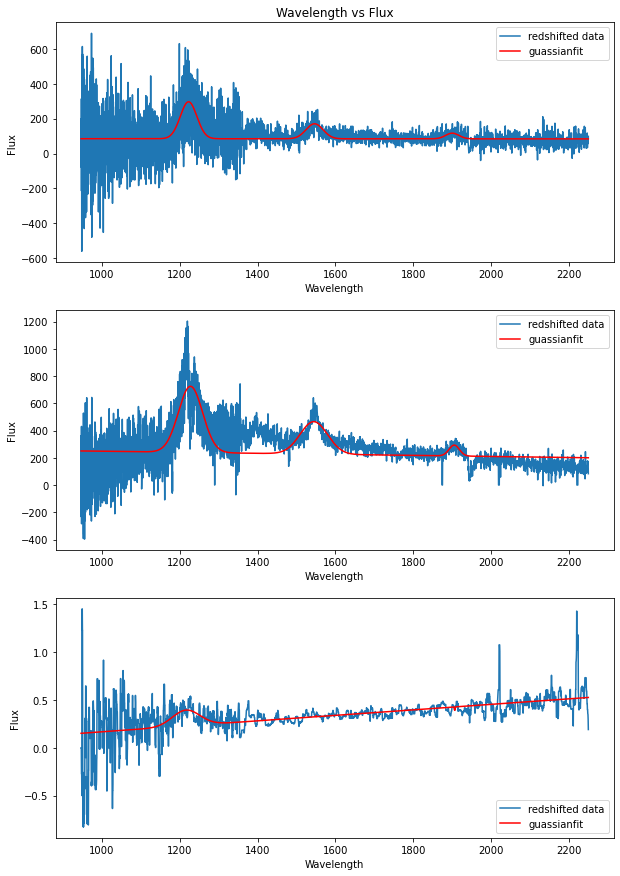

J1233-3542.npy
2.28
['J1233-3542', 2249.697884658766, 38.79770314114043, 210.1940381129135, 10.668993597711324, 10, 0.08654270385566953, 1211.9777909423237, 0.06078176524450801, 5671.737013902206, 63.05281833157323, 664.687208756799, 21.236494251452346, 15, 0.08632116865950168, 1212.2425511111487, 0.06038943865480877, 0.3460911213024376, 0.00813862536462261, 0.29513146199940876, 0.01896624811079398, 7, 1.7331785419581072, 1210.6376192866699, 1.2197641386486264, 826.6143418292038, 32.06434774299014, 194.84761664524729, 11.635888731386753, 15, 0.3501189498226822, 1545.5251972684352, 0.24626636345428402, 2185.000276078438, 55.0834403982735, 566.9389170888883, 23.148241114835134, 21, 0.3177699180827909, 1545.3855034760577, 0.223010636853405, 0.2896507401245876, 0.0175016204582363, 0.34558245935517884, 0.024862685183203424, 4, 2.0283146545861777, 1550.6072150075818, 0.8870737500448344, 308.5380416181789, 44.42504268952612, 178.1038759800121, 12.840390132734726, 15, 2.4682156503247326, 1909.

<Figure size 432x288 with 0 Axes>

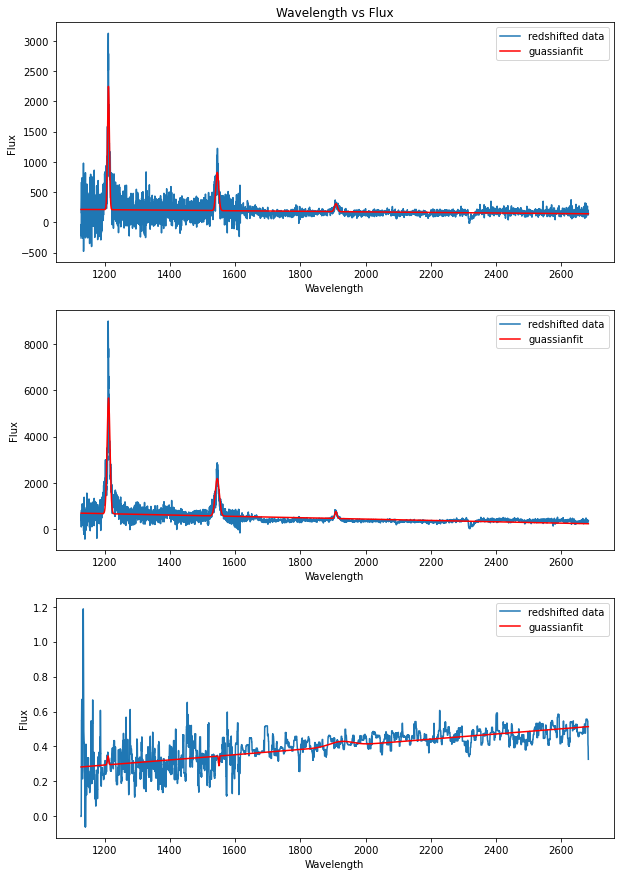

J1237+3340.npy
1.795


/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


['J1237+3340', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 314.2726851922603, 12.828760974547652, 111.75982475178036, 6.687862878169873, 42, 1.1222507502067147, 1549.097140216998, 0.7764458702528378, 205.30067002818538, 14.502048180922277, 57.70104365969212, 6.138597398044503, 26, 1.1480643710883085, 1547.9585370337777, 0.8017684292122335, 1.9286750445186016, 0.12488912291775674, 0.8497740990955398, 0.23641823185106386, 118, 2.4362825000699653, 1553.1447238945163, 1.5998217727340478, 156.49515385132858, 13.340326968194203, 89.06220773576491, 7.240013221200448, 52, 4.399334477745109, 1895.0000000000002, 3.216987975914579, 72.81863171947103, 75.32919631366616, 88.28493089858577, 6.671860495441504, 1, 24.995981681827704, 1908.357716425762, 60.23519932167631, 1.5262711289278448, 2.2307387541072403, 0.6635094190235262, 0.11197019464061064, 53, 2.4362825000699653, 1919.9999999999961, 1.8538678876902452, 57.127258645767625, 13.418307174252162, 28.693213771244586, 8

<Figure size 432x288 with 0 Axes>

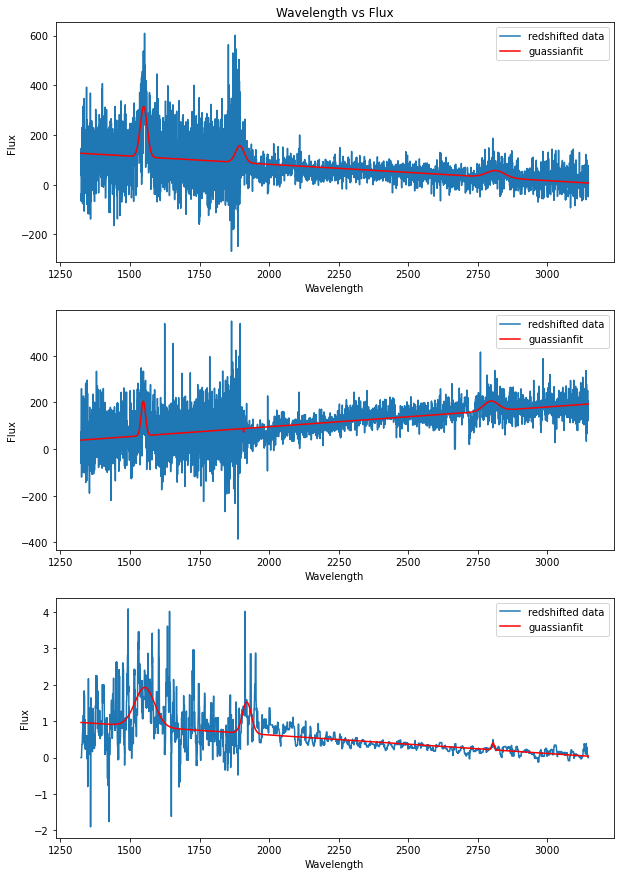

J1303+1816.npy
2.95


/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


['J1303+1816', 374.98619839716685, 8.409687574686922, 118.96707297458553, 5.098306098209315, 48, 0.6219134067157611, 1220.4165310999956, 0.4288267016495085, 210.10323211912578, 8.361947638281267, 61.61777417955214, 3.250904628641921, 15, 0.3876292416285561, 1217.1257823371068, 0.27207890204068685, 2.780479783111601, 0.0815336549336821, 1.7574348418904115, 0.1312335227135154, 108, 2.2731550461799728, 1229.9999999999998, 1.5071391417131963, 249.27633525183796, 11.0327686100014, 107.76508237541212, 5.665534013866041, 49, 1.6170087677410647, 1545.2162951122857, 1.1328958736792398, 160.2712213189121, 8.175526780931015, 95.84636703710996, 3.6235699903549503, 35, 1.948973529752603, 1546.9168877603663, 1.3696735764686496, 1.6673496789342581, 0.10503967510417792, 1.2976097530484898, 0.07280748501097425, 44, 2.4362825000699653, 1543.584385834059, 3.8333136542510187, 150.01966162741564, 13.09238638550375, 95.45387779512653, 6.3610154074682015, 34, 3.518454048387456, 1902.1775250814342, 2.45528965

<Figure size 432x288 with 0 Axes>

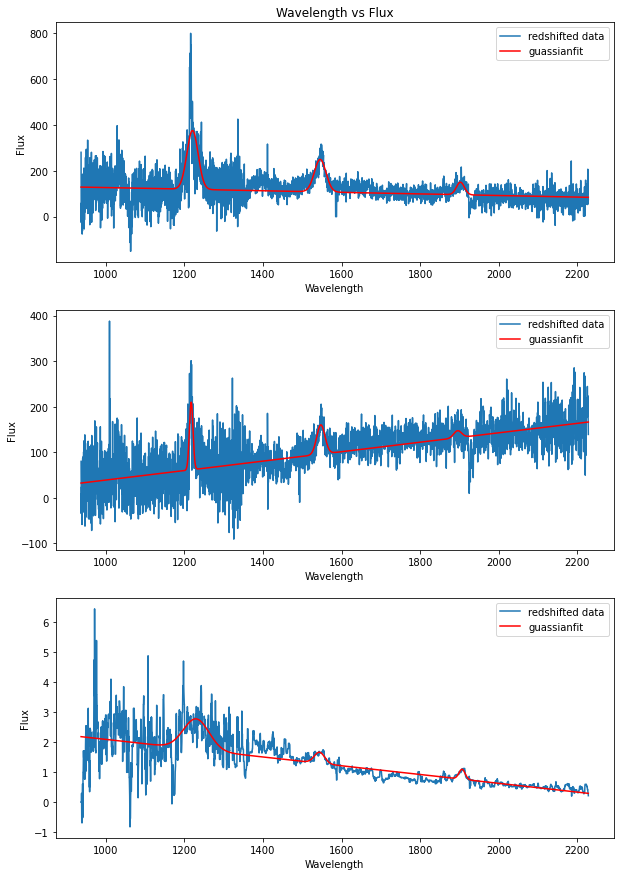

J1307+0642.npy
2.03


/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


['J1307+0642', 103.14300460003258, 49.67815596151499, 341.77920486889207, 5.098306098209315, 118, 19.08414298462604, 1229.999999304985, 18.031203893597986, 528.0935413346704, 24.330420672314318, 261.0682884412546, 3.250904628641921, 47, 3.882272305833111, 1226.9584260528477, 3.3641242288651623, 0.3148810623098638, 0.09450014953619892, 0.8893535816148033, 0.02543862224689336, 118, 24.55377207080472, 1229.9999999999277, 23.214073935720183, 396.3214721882342, 42.7965624530548, 737.733776663046, 33.852640807485784, 118, 4.7184779035212365, 1535.0000000002794, 3.025610828939232, 620.4950416236705, 20.698216332868526, 265.27550307124585, 13.544796855567542, 62, 1.3649270722520472, 1555.6733659642755, 0.9345472668633671, 0.8444752747804032, 0.07218751474397313, 2.6737897674742657, 0.1909139642753606, 118, 2.6958228619828413, 1561.0875280969142, 1.7512612077083818, 2024.7895595171158, 52.00514120975814, 1226.4692038771177, 36.828856949304786, 118, 2.699511941775145, 1911.4682018060196, 1.86273

<Figure size 432x288 with 0 Axes>

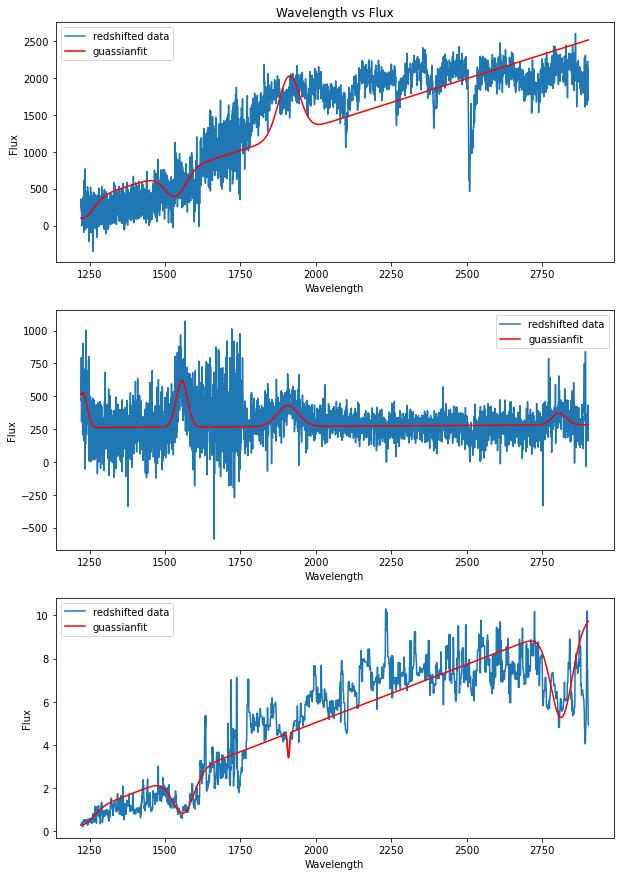

J1326+3020.npy
1.852


/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


['J1326+3020', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 271.4337245482283, 11.840034830088715, 103.570209767986, 6.051658894404771, 43, 1.3044940198346726, 1546.1325780876061, 0.9031475792088121, 1305.0231004962766, 15.739927557435252, 360.1985703999996, 9.569781560424717, 61, 0.4005473447072985, 1548.8776174387783, 0.27478973979862764, 0.16526465179950497, 0.009413089353935871, 0.3292946024817569, 0.0184561331600622, 118, 4.4786554285784215, 1564.9999999999998, 2.940689501621948, 226.3581284286421, 16.188433372747284, 158.41905233583842, 6.563018502641127, 42, 4.4933162436605185, 1901.494693560063, 3.1594329177068112, 537.0257045144963, 40.25457417759065, 306.80146163263464, 10.420540218981095, 13, 1.0526343301984824, 1908.6581922510773, 0.7429989899028798, 0.3786434387781002, 0.04366869420332599, 0.6345164669790662, 0.02766210491044586, 118, 4.4786554285784215, 1895.0000000000002, 2.471639503398661, 363.92064714468137, 70.42520913882224, 297.09598178310

<Figure size 432x288 with 0 Axes>

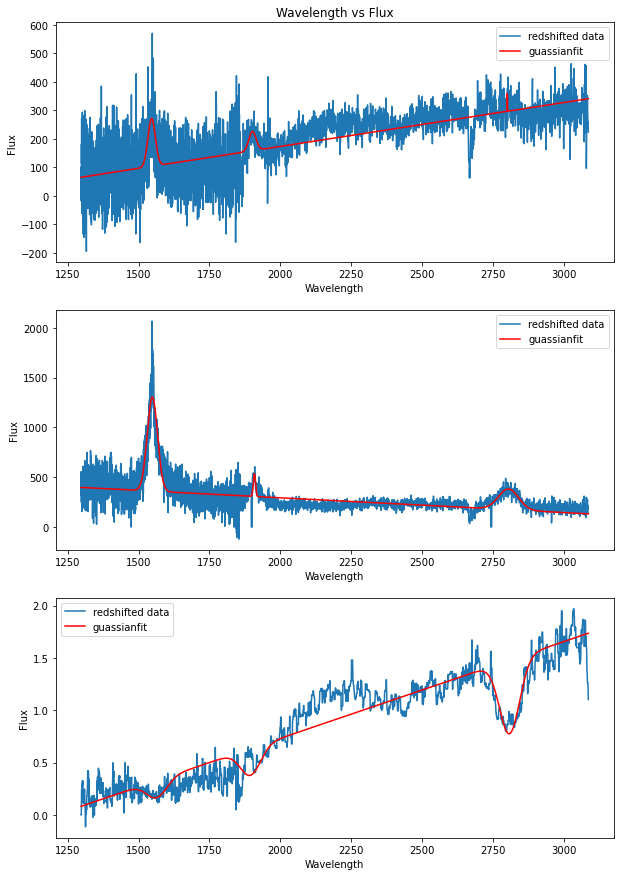

J1329-2807.npy
2.685


/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


['J1329-2807', 346.9534761665883, 16.20814873593056, 60.20163813278066, 6.121129280547622, 16, 0.41091960342638983, 1219.140934460918, 0.28799679462030026, 898.0577239711406, 38.7995542603487, 279.7825094719867, 15.190728476856693, 17, 0.4907109000833631, 1219.2367066603529, 0.3434305302867769, 0.39465027893341587, 0.02458310465062189, 0.16637805364256095, 0.024802044450855754, 54, 2.2532220221872135, 1229.9999999997756, 1.5414457895324716, 301.6137006245989, 21.647240492944984, 65.51544406107432, 6.769929287120029, 18, 0.7496909375655687, 1550.8339391382872, 0.5286383904520839, 500.75374468977697, 25.87517985596527, 259.68320025188495, 16.756987646839185, 118, 4.7891999793746605, 1545.2318647248503, 3.31946689528693, 0.46974703236190873, 0.053267579977038564, 0.24500972332737683, 0.03073561331423414, 25, 4.4786554285784215, 1546.137936565714, 1.541749500572286, 125.57473538051002, 13.763336354211397, 71.14199931110475, 7.541303832308021, 57, 5.955204814317266, 1902.049064803427, 4.150

<Figure size 432x288 with 0 Axes>

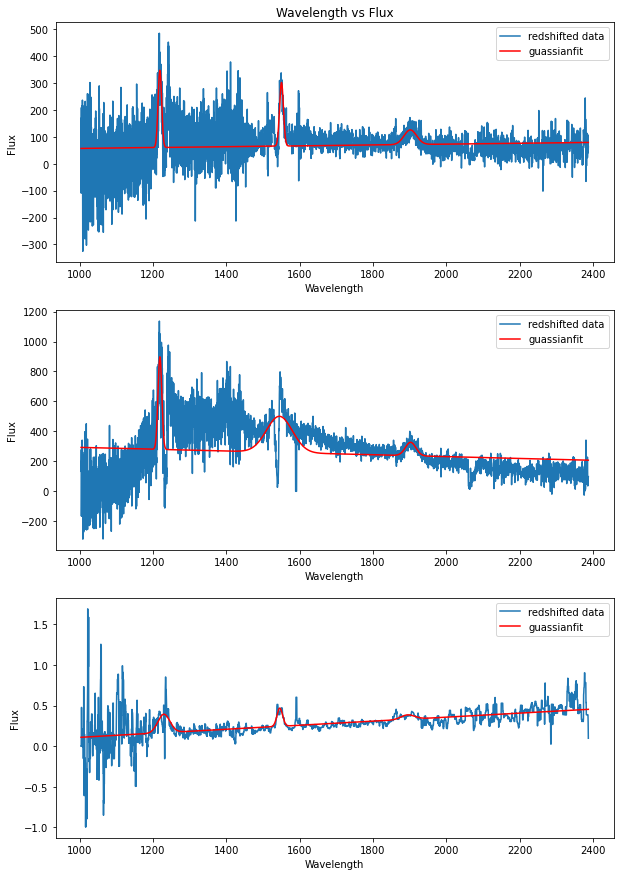

J1344+6200.npy
2.21


/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


['J1344+6200', 410.4670982272138, 11.841064735033118, 149.92502440208997, 7.252120224797067, 59, 1.085544408206518, 1223.2562677242254, 0.7256314830634983, 748.574223257107, 12.185770798403905, 216.69498511555906, 6.415695652382446, 41, 0.39900259631795015, 1219.4561544670667, 0.2723865578998854, 0.5102871265960687, 0.018162855259159706, 0.6871650852710608, 0.039238264712143256, 18, 2.091248253195262, 1216.328510409744, 1.4587353311139735, 287.09824108697205, 14.322903558758304, 158.01424350243005, 7.848311158446716, 36, 1.6354523517360273, 1550.241531840932, 1.1358921091379357, 435.452950890562, 13.20116032422129, 198.2357001492167, 6.9566817388543996, 35, 0.8094806777621515, 1549.0576169730002, 0.563704844687502, 0.5926688613737539, 0.038488760285943016, 0.82390103106737, 0.04847581619284658, 19, 4.4786554285784215, 1546.874854276366, 1.1555601196903305, 127.21475854286217, 12.782629144283865, 166.54315012814556, 8.566624838155663, 118, 14.105559211663618, 1895.0000000000002, 9.78868

<Figure size 432x288 with 0 Axes>

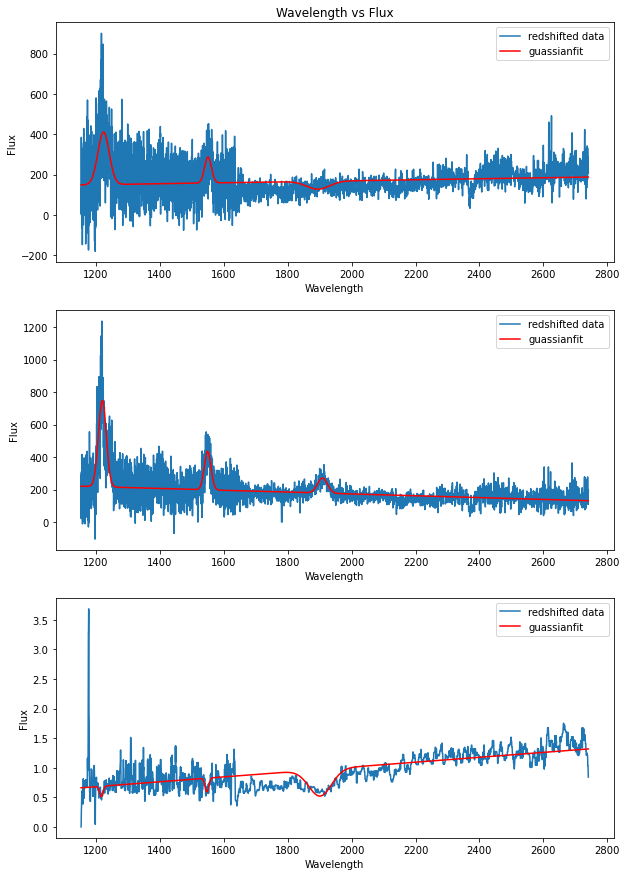

J1408+0422.npy
3.005
['J1408+0422', 226.76329438061066, 15.561438764213362, 21.352291475134635, 5.394676572717634, 12, 0.40349410287418286, 1215.7112282022274, 0.28378017755172474, 327.7427444205897, 9.627796022307905, 49.593558245370865, 5.317887051046754, 36, 0.519331141972636, 1218.4764519130285, 0.3606293614281602, 0.49936835683474706, 0.051648072130777226, 0.2653071846277407, 0.11816940590801103, 29, 3.0957590731085247, 1207.8505695261176, 2.1556437152460384, 78.28601926329357, 17.145912623055327, 53.53088041330662, 6.0338309424955465, 20, 6.317908059466037, 1551.7586148275693, 4.451654681281743, 206.13284109369707, 11.413510365690685, 71.89895138353802, 5.9296374444307105, 51, 1.82077536190298, 1548.285482841756, 1.2752677671671353, 0.32351856673304535, 0.08579590072391781, 0.5869340089107701, 0.1039856847000799, 118, 4.4786554285784215, 1535.0000000000002, 5.5520189231214525, 37.02979685988392, 18.410049008348533, 87.16474325187082, 6.77776926984403, 18, 2.9636959755831844, 1903

<Figure size 432x288 with 0 Axes>

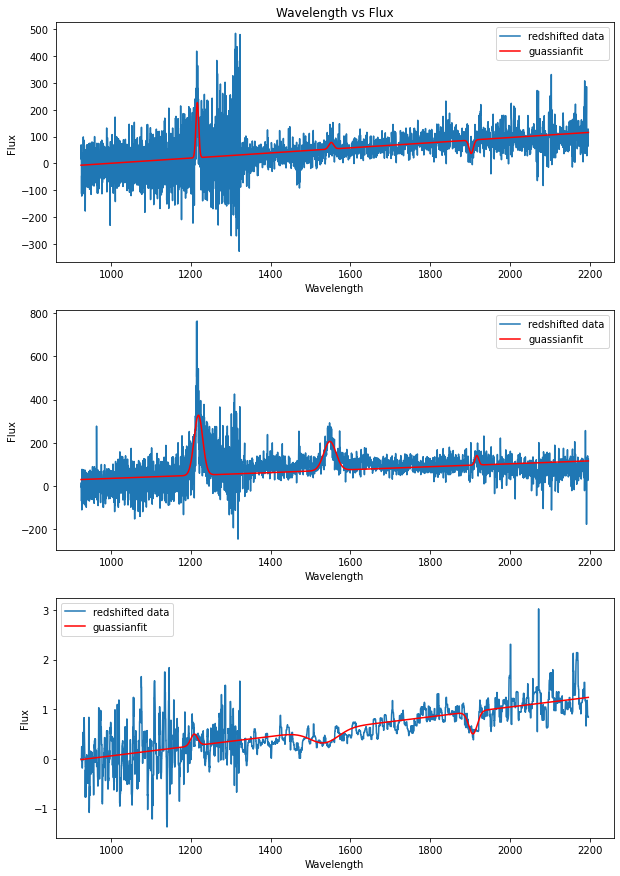

J1526-1400.npy
0.648
['J1526-1400', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2083.57416762555, 71.50124775773148, 1107.0919787174296, 43.27025745563513, 118, 3.4315662025296176, 2805.526202350996, 6.538185128996665, 1109.2394938543553, 91.0101512405968, 1557.1861711514143, 55.08572475661339, 118, 9.518478199175455, 2814.9999977056264, 6.538185128996665, 1.7464026614351797, 0.16705340781257105, 0.9708137931809266, 0.03747901479836669, 118, 3.6285088910053673, 2797.0155115937378, 2.4907789538273737]


<Figure size 432x288 with 0 Axes>

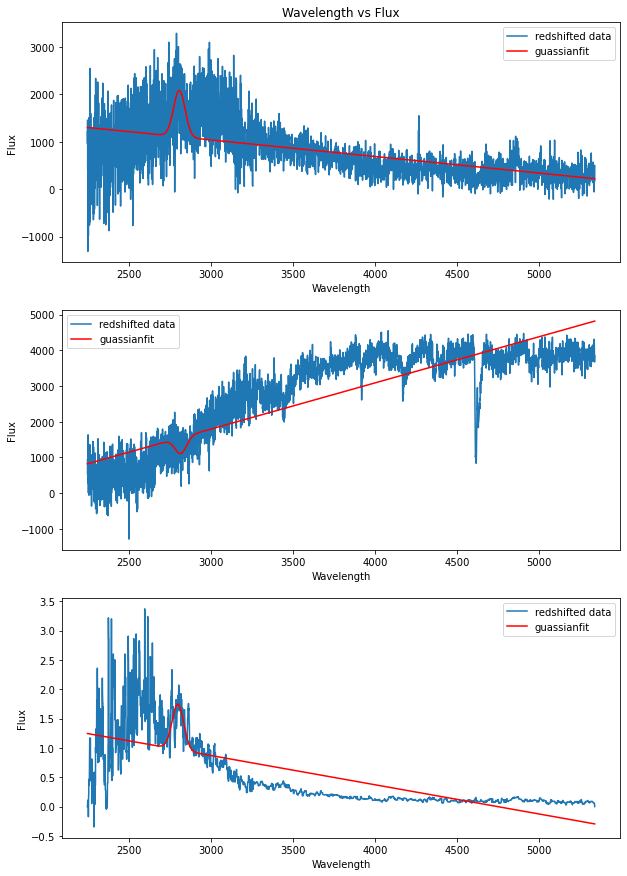

J1548-2914.npy
1.545
['J1548-2914', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 251.22027316021803, 6.674843637153412, 125.36586326000436, 3.8441644487966573, 62, 1.352865749334139, 1545.2497283335977, 0.9151384663539249, 1980.7021341611276, 14.919357164304023, 1061.5812861106178, 8.833945998773961, 66, 0.437324488734904, 1547.8460493541443, 0.2946585820355582, 0.13312657720183396, 0.0035027408102589496, 0.11120104756826428, 0.0037521444555365492, 3, 0.6589965657214794, 1549.9433942866547, 0.4652077018832797, 195.0577541916876, 7.015551854443734, 138.13096803524923, 4.115907877323718, 57, 2.807338583659009, 1897.072911962679, 1.9402179845063048, 1376.8766282124834, 15.612552574138151, 971.7730481986825, 9.46182889014189, 61, 0.9366045282899517, 1902.7072918748172, 0.6458109820970064, 0.13039869405705362, 0.005342487425196431, 0.1483229727053948, 0.00445584986320056, 118, 0.6589965657214794, 1919.9999999999998, 3.888231600579365, 261.6838038675428, 8.35458880

<Figure size 432x288 with 0 Axes>

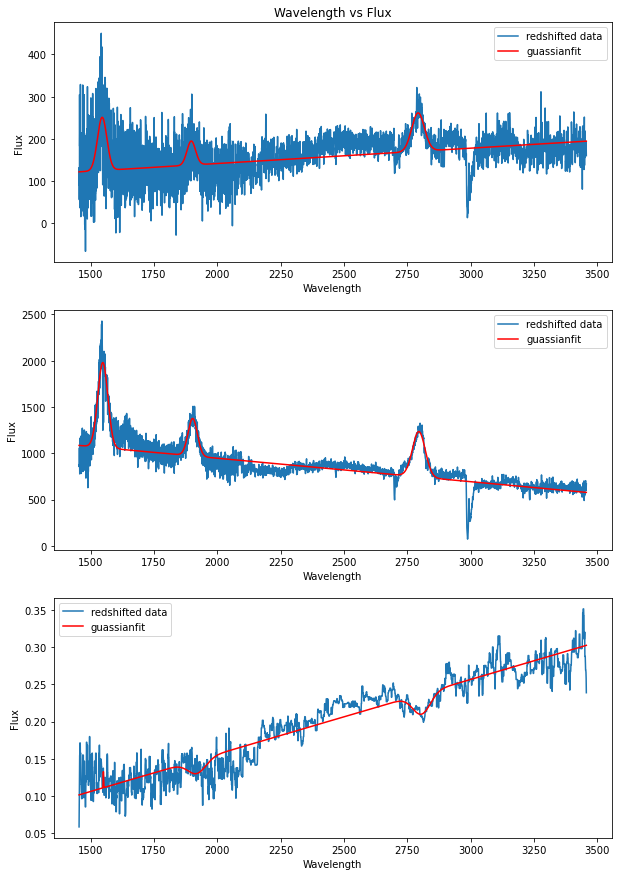

J1550+0221.npy
2.395


/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2
/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: invalid value encountered in true_divide
  y3=y1/y2


['J1550+0221', 321.04038429803376, 9.839441542651544, 73.94971066327379, 4.2723006895029085, 24, 0.4352132939991397, 1218.153717065047, 0.30234662138936297, 2206.7546114708616, 26.413748734637707, 568.3351233732062, 12.61898040401505, 31, 0.21547923757159917, 1218.0979005426605, 0.14894386108979824, 0.15136006094676202, 0.0047867515094634685, 0.12801782266778808, 0.008053266012374546, 5, 1.53043432153068, 1217.7859413169729, 1.0783410425693656, 138.587937248509, 8.500862319815894, 75.69299899689746, 4.66552273628634, 54, 3.020310080717402, 1546.9956968132399, 2.17980441418185, 1077.9017341308086, 24.913673602457813, 504.24844924794536, 13.784118751025886, 58, 1.0230343792535805, 1549.4476271589629, 0.7273706864850277, 0.1273902941822662, 0.00842779549238995, 0.15608034487764344, 0.010121534405039514, 118, 0.6589965657214794, 1538.4590731978528, 5.433205039322353, 127.03314155297002, 13.040827090047841, 77.61036366555415, 5.1573151252022065, 28, 3.3117318282732966, 1908.674244979565, 2.

<Figure size 432x288 with 0 Axes>

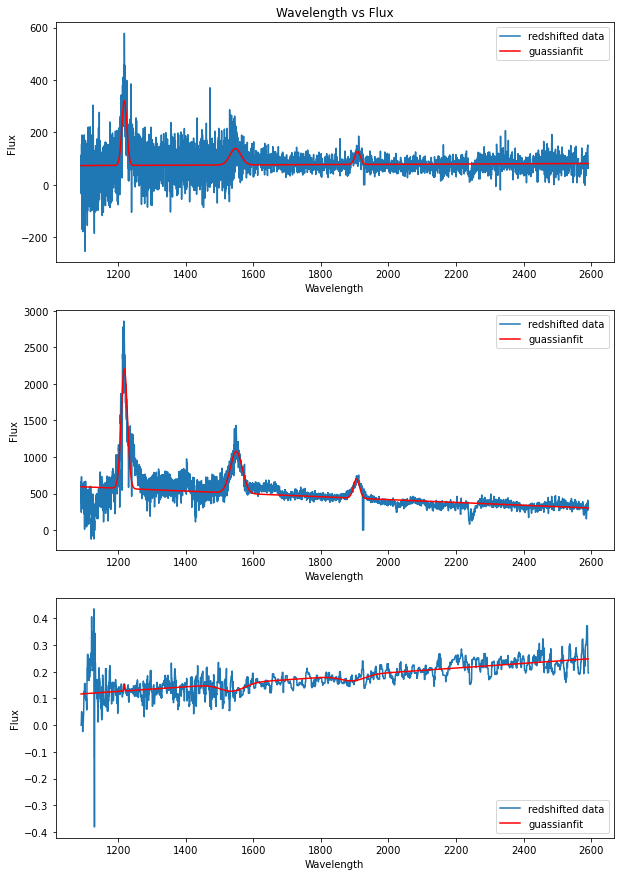

J0816+2339.npy
1.22


/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


['J0816+2339', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 87.31855008313676, 10.076504165521024, 59.402126651586876, 6.7606620946515115, 118, 16.06516827934896, 1895.0000000000002, 10.706684944822637, 148.29877290273794, 7.603568418378041, 79.82576273586803, 4.03015024446861, 62, 2.9113488499756595, 1903.6709319214458, 2.00375015200101, 0.7411202283292604, 0.07435196403947918, 0.5471941598993044, 0.09265169902331626, 332, 24.05915236916795, 1919.9999999999998, 13.189997391380578, 92.97440611814999, 15.064688738379171, 46.23332189609977, 7.921293893326184, 81, 10.902043271260704, 2800.8211508265586, 1.693388317409302, 219.34408295186932, 8.937688412354934, 76.4893424310557, 4734.116771663497, 92, 2.4170829906923617, 2795.6467899397758, 1.693388317409302, 0.335720207616792, 0.07081908085510727, 0.5254914165933448, 37.41053114438366, 42, 9.772574133833613, 2787.8447975052077, 6.86747319326

<Figure size 432x288 with 0 Axes>

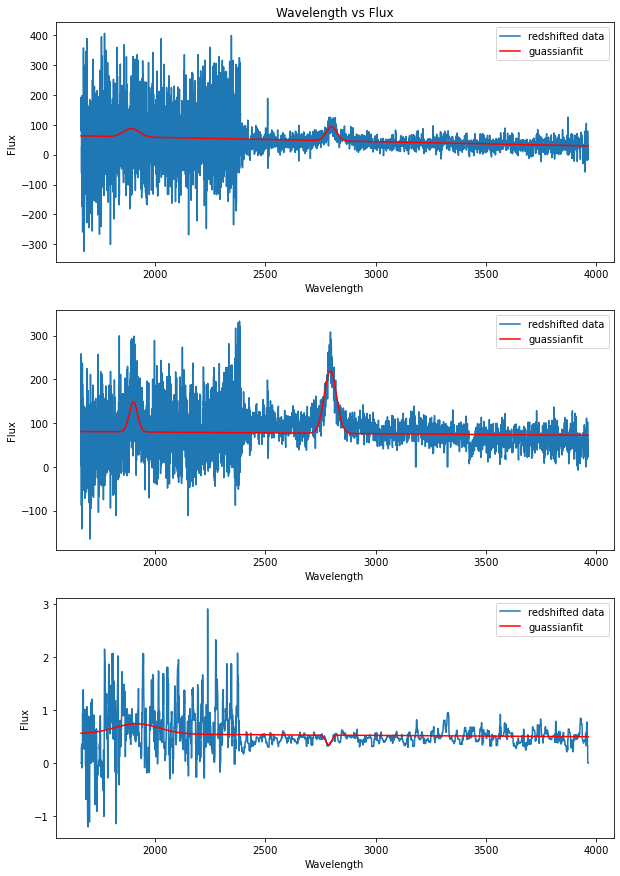

J1045+3433.npy
1.205
['J1045+3433', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 229.61993404797647, 8.256868042509092, 130.45692738806142, 5.530349883377461, 118, 3.71286368777187, 1895.0000000065697, 2.472638809559515, 257.1399439411918, 7.720170417521919, 161.33022178542657, 4.714339131824408, 91, 2.9170353582311646, 1895.659759439086, 1.9753142133991493, 0.9296072954851692, 0.04183128225968329, 0.7095851434220449, 0.04163478645775611, 706, 31.649321724508077, 1895.0000000000002, 15.034751080785167, 140.7593573277768, 14.057766993880477, 90.35680168327534, 6.4682555006629485, 57, 6.959458705623928, 2798.422809953972, 3.4966854300864227, 192.92279369626917, 10.985067635350644, 121.07879594577474, 9795.496569239916, 77, 4.983204746177101, 2801.3660333174835, 3.4966854300864227, 0.7917788515204796, 0.08387840598020917, 0.6928565599386731, 60.37418620243884, 16, 7.1473762383233375, 2794.09

/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2
/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: invalid value encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

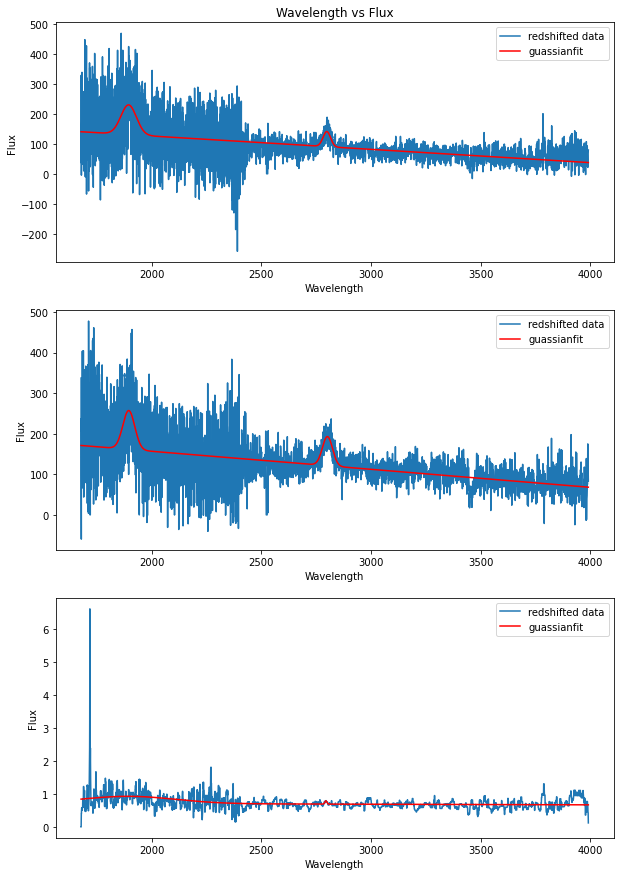

J1102+3421.npy
1.405
['J1102+3421', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 615.8285407536764, 17.75901023550748, 404.9015932001779, 9.397901178490411, 56, 1.9746607195921877, 1907.0629274170765, 1.3688776182960471, 256.05711632197006, 9.820227550856833, 181.43240601413515, 3.972879401719559, 29, 1.699975258146237, 1913.262831468358, 1.190512651879251, 2.952087446900756, 0.11540350700502565, 2.3318874326806944, 0.07121206348836653, 29, 3.2925985732870013, 1899.975069818547, 2.3011099427368076, 332.20685467476915, 24.619146136570407, 213.80588264664516, 11.214979565585066, 55, 4.97145313208143, 2804.3444751183233, 2.099732266353965, 229.01875934614498, 9.895830420700092, 137.62153747452913, 5888.227583521584, 64, 2.995555448755239, 2804.2750181158617, 2.099732266353965, 1.2171195174756486, 0.12443672605897631, 1.619226763597366, 66.47092971872128, 706, 42.660408158287, 2785.0000000000

/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2
/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: invalid value encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

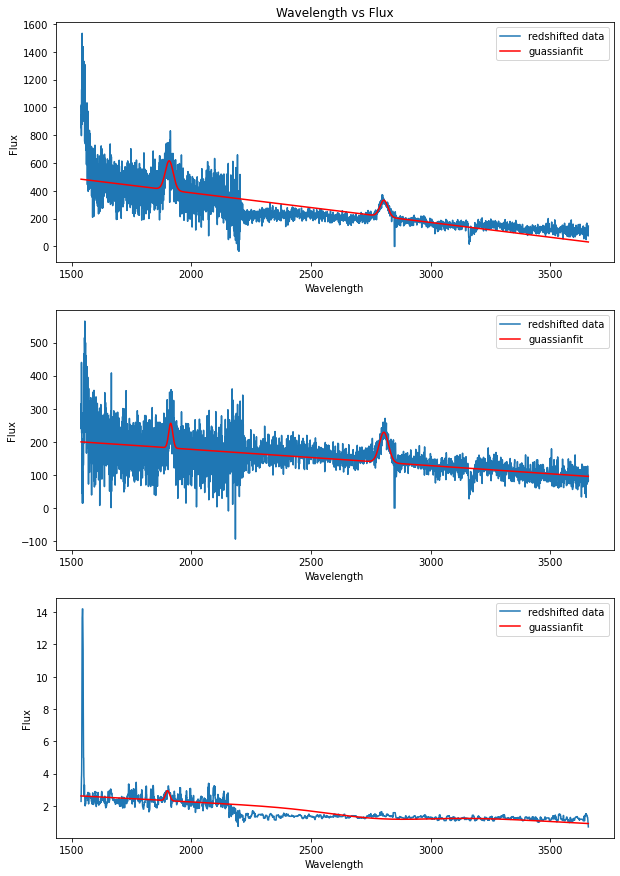

J1428+0500.npy
1.375
['J1428+0500', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 316.4514427314788, 12.469715412836775, 206.36536958987426, 6.650916272004978, 58, 2.7452184617456625, 1899.5079541630635, 1.8993935564669764, 384.7248700612382, 13.726704248998201, 275.814354514937, 6.132759802423931, 37, 2.063828927489263, 1903.34361913343, 1.4400312629410805, 0.8191791331170584, 0.04372439259911685, 0.6902692344527732, 0.029295767270614167, 596, 22.024277024382037, 1919.9999999999998, 9.297523757202509, 186.610441630274, 14.411652024036298, 126.6848988755084, 7.917690335507539, 92, 9.110249879580143, 2797.3131940001763, 2.5851788210501296, 273.93627533328544, 16.11724566637867, 165.7862339792951, 7247.0542569226445, 56, 3.6825220443241347, 2803.308048259633, 2.5851788210501296, 0.5768544705322193, 0.0661374794885642, 0.7537715866563718, 33.40333841062116, 14, 1.891527138210538, 2799.1312574

/tmp/ipykernel_24162/1046256721.py:32: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

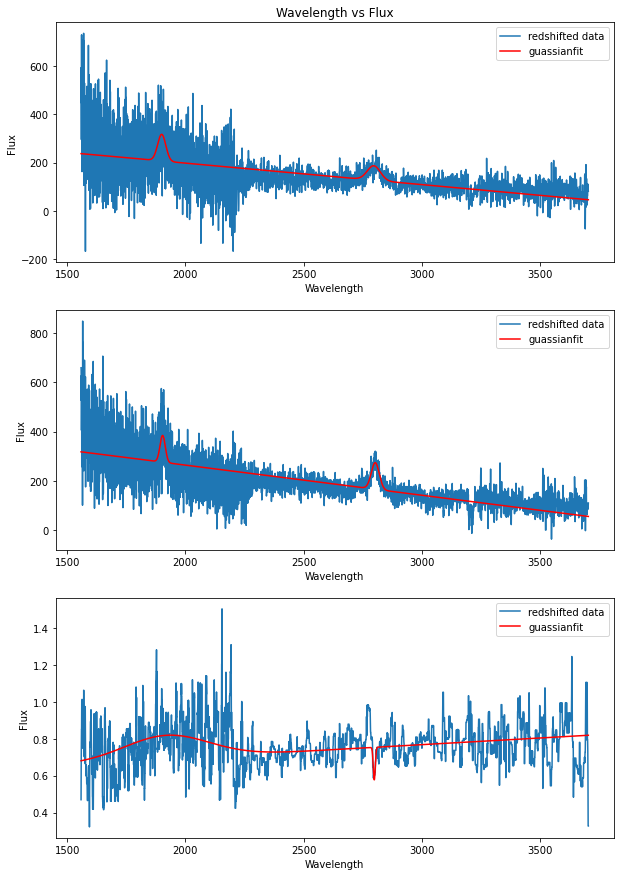

<Figure size 432x288 with 0 Axes>

In [209]:
DF=pd.read_csv('WHT.csv',header=0)
Spectra=DF.Spectra
z=DF.z
name=DF.Name
for i in range(0,len(DF)): 
    
    source=np.load(path+Spectra[i],allow_pickle=True)  
    print(Spectra[i])
    z=DF.z[i]
    print(z)
    wavelength=source[2]
    flux=source[0]
    bright_flux=flux1=flux[0]
    faint_flux=flux2=flux[1]
    fig, ax=plt.subplots(3,1,figsize=(10,15))  
    fig.patch.set_facecolor('white')
   #BRIGHT SPECTRUM---------------------------------------------------------------------------------------
    x=wavelength
    pos=np.where((x >3700) & (x <8800)) 
    X=wavelength[pos]
    
    x=X/(z+1)
    y1=flux1[pos]
    x= np.nan_to_num(x)
    y1= np.nan_to_num(y1)        
    med1=statistics.median(y1) 
    y2=flux2[pos]
    x= np.nan_to_num(x)
    y2= np.nan_to_num(y2)
    med2=statistics.median(y2)
    
    y3=y1/y2
    
    y3=np.nan_to_num(y3,nan=np.nanmedian(y3))
    y3=medfilt(y3,13)
    med3=statistics.median(y3)
    ax[0].set_title('Wavelength vs Flux')
    if ((z>=2) and (z<=2.178)):
    
        p01=[med1,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1] #change this when : Optimal parameters not found:
                                             #Number of calls to function has reached maxfev = 1800.
        popt1,pcov1= curve_fit(gauss4,x,y1,p0=p01,
            bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0]
            ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1915,50,np.inf,2815,50]])
        
        perr1 = np.sqrt(np.diag(pcov1))
        
        FWHM_LyA1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_LyA1_err=round(2*np.log(2))*perr1[4]
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIV1_err=round(2*np.log(2))*perr1[7]
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[10])
        FWHM_CIII1_err=round(2*np.log(2))*perr1[10]
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[13])
        FWHM_MgII1_err=round(2*np.log(2))*perr1[13]


        LyA_low1=(popt1[0]+popt1[1]*popt1[3])
        
        lyA_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2)
        LyA_high1=(gauss4(popt1[3],*popt1)) 
        LyA_high1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+perr1[2]**2)
        LyA_dif1=LyA_high1-LyA_low1

        CIV_low1=(popt1[0]+popt1[1]*popt1[6])
        CIV_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2)
        CIV_high1=(gauss4(popt1[6],*popt1))

        CIV_high1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+perr1[5]**2)
        CIV_dif1=CIV_high1-CIV_low1
        
        CIII_low1=(popt1[0]+popt1[1]*popt1[9])
        CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2)
        CIII_high1=(gauss4(popt1[9],*popt1)) 
        
        
        CIII_high1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2+perr1[8]**2)
        
        CIII_dif1=CIII_high1-CIII_low1
    
        MgII_low1=(popt1[0]+popt1[1]*popt1[12])
        MgII_low1_err=np.sqrt(perr1[0]**2+(popt1[12]*perr1[1])**2)
        MgII_high1=(gauss4(popt1[12],*popt1)) 
        
              
        MgII_high1_err=np.sqrt(perr1[0]**2+(popt1[12]*perr1[1])**2+perr1[11]**2)
        
        
        MgII_dif1=MgII_high1-MgII_low1
               
          
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss4(x, *popt1),'r', label='guassianfit')
         
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1] #change this when : Optimal parameters not found:
                                                 #Number of calls to function has reached maxfev = 1800.
        popt2,pcov2= curve_fit(gauss4,x,y2,p0=p02,
        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0]
                 ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])
        
        
        perr2 = np.sqrt(np.diag(pcov2))

        FWHM_LyA2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_LyA2_err=round(2*np.log(2))*perr2[4]
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIV2_err=round(2*np.log(2))*perr2[7]
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[10])
        FWHM_CIII2=round(2*np.log(2))*perr2[10]
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[13])
        FWHM_MgII2_err=round(2*np.log(2))*perr2[13]

        LyA_low2=(popt2[0]+popt2[1]*popt2[3])
        lyA_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2)
        LyA_high2=(gauss4(popt2[3],*popt2)) 
        LyA_high2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+perr2[2]**2)
        LyA_dif2=LyA_high2-LyA_low2


        CIV_low2=(popt2[0]+popt2[1]*popt2[6])
        CIV_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2)
        CIV_high2=(gauss4(popt2[6],*popt2))
        CIV_high2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2+perr2[5]**2)
        CIV_dif2=CIV_high2-CIV_low2

    
        CIII_low2=(popt2[0]+popt2[1]*popt2[9])
        CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2)
        CIII_high2=(gauss4(popt2[9],*popt2))  
        CIII_high2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2+perr2[8]**2)
        
        CIII_dif2=CIII_high2-CIII_low2

    
        MgII_low2=(popt2[0]+popt2[1]*popt2[12])
        MgII_low2_err=np.sqrt(perr2[0]**2+(popt2[12]*perr2[1])**2)
        MgII_high2=(gauss4(popt2[12],*popt2))
        MgII_high2_err=np.sqrt(perr2[0]**2+(popt2[12]*perr2[1])**2+perr2[11]**2)
        
        MgII_dif2=MgII_high2-MgII_low2
              
        p03=[med3,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1]
        popt3,pcov3= curve_fit(gauss4,x,y3,p0=p03,
        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0]
                 ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])
        perr3 = np.sqrt(np.diag(pcov3))
        
        FWHM_LyA3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_LyA3_err=round(2*np.log(2))*perr3[4]
        FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[7])
        FWHM_CIV3_err=round(2*np.log(2))*perr3[7]
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[10])
        FWHM_CIII3_err=round(2*np.log(2))*perr3[10]
        FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[13])
        FWHM_MgII3_err=round(2*np.log(2))*perr3[13]


        LyA_low3=(popt3[0]+popt3[1]*popt3[3])
        LyA_low3_err=(LyA_low1/LyA_low2)*np.sqrt((LyA_low1_err/LyA_low1)**2+(LyA_low2_err/LyA_low2)**2)
        LyA_high3=(gauss4(popt3[3],*popt3))
        LyA_high3_err=(LyA_high1/LyA_high2)*np.sqrt((LyA_high1_err/LyA_high1)**2+(LyA_high2_err/LyA_high2)**2)
        LyA_dif3=LyA_high3-LyA_low3
        
        CIV_low3=(popt3[0]+popt3[1]*popt3[6])
        CIV_low3_err=(CIV_low1/CIV_low2)*np.sqrt((CIV_low1_err/CIV_low1)**2+(CIV_low2_err/CIV_low2)**2)
        CIV_high3=(gauss4(popt3[6],*popt3))
        CIV_high3_err=(CIV_high1/CIV_high2)*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
        CIV_dif3=CIV_high3-CIV_low3

    
        CIII_low3=(popt3[0]+popt3[1]*popt3[9])
        CIII_low3_err=(CIII_low1/CIII_low2)*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        CIII_high3=(gauss4(popt3[9],*popt3)) 
        CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        
        CIII_dif3=CIII_high3-CIII_low3

    
        MgII_low3=(popt3[0]+popt3[1]*popt3[12])
        MgII_low3_err=(MgII_low1/MgII_low2)*np.sqrt((MgII_low1_err/MgII_low1)**2+(MgII_low2_err/MgII_low2)**2)
        MgII_high3=(gauss4(popt3[12],*popt3))    
        MgII_high3_err=(MgII_high1/MgII_high2)*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
        MgII_dif3=MgII_high3-MgII_low3
            
        value=[name[i],LyA_high1,LyA_high1_err,LyA_low1,LyA_low1_err,FWHM_LyA1,FWHM_LyA1_err,popt1[3],perr1[3],
               LyA_high2,LyA_high2_err,LyA_low2,LyA_low2_err,FWHM_LyA2,FWHM_LyA2_err,popt2[3],perr2[3],
               LyA_high3,LyA_high3_err,LyA_low3,LyA_low3_err,FWHM_LyA3,FWHM_LyA3_err,popt3[3],perr3[3],
               CIV_high1,CIV_high1_err,CIV_low1,CIV_low1_err,FWHM_CIV1,FWHM_CIV1_err,popt1[6],perr1[6],
               CIV_high2,CIV_high2_err,CIV_low2,CIV_low2_err,FWHM_CIV2,FWHM_CIV2_err,popt2[6],perr2[6],
               CIV_high3,CIV_high3_err,CIV_low3,CIV_low3_err,FWHM_CIV3,FWHM_CIV3_err,popt3[6],perr3[6],
               CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[9],perr1[9],
               CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[9],perr2[9],
               CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[9],perr3[9],
               MgII_high1,MgII_high1_err,MgII_low1,MgII_low1_err,FWHM_MgII1,FWHM_MgII1_err,popt1[12],perr2[12],
               MgII_high2,MgII_high2_err,MgII_low2,MgII_low2_err,FWHM_MgII2,FWHM_MgII2_err,popt2[12],perr2[12],
               MgII_high3,MgII_high3_err,MgII_low3,MgII_low3_err,FWHM_MgII3,FWHM_MgII3_err,popt3[12],perr3[12]]
        print(value)
        
        error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
                    'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
                    'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
                   'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
                    'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
                    'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
                   'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
                    'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
                    'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        error=[name[i],popt1[0],perr1[0],popt1[1],perr1[1],popt1[2],perr1[2],popt1[3],perr1[3],
               popt1[4],perr1[4],popt1[5],perr1[5],popt1[6],perr1[6],popt1[7],perr1[7],popt1[8],perr1[8],
               popt1[9],perr1[9],popt1[10],perr1[10],popt1[11],perr1[11],popt1[12],perr1[12],
               popt1[13],perr1[13],popt2[0],perr2[0],popt2[1],perr2[1],popt2[2],perr2[2],popt2[3],perr2[3],
               popt2[4],perr2[4],popt2[5],perr2[5],popt2[6],perr2[6],popt2[7],perr2[7],popt2[8],perr2[8],
               popt2[9],perr2[9],popt2[10],perr2[10],popt2[11],perr2[11],popt2[12],perr2[12],
               popt2[13],perr2[13],popt3[0],perr3[0],popt3[1],perr3[1],popt3[2],perr3[2],
               popt3[3],perr3[3],popt3[4],perr3[4],popt3[5],perr3[5],popt3[6],perr3[6],popt3[7],perr3[7],
               popt3[8],perr3[8],popt3[9],perr3[9],popt3[10],perr3[10],popt3[11],perr3[11],
               popt3[12],perr3[12],popt3[13],perr3[13]]
        


        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss4(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
                

        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss4(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
               
        
        
    elif ((z>=1.42) and (z<=2.178)):
        p01=[med1,1,10,1549,1,10,1908,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss3,x,y1,p0=p01,
                               bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0],
                    [np.inf,np.inf,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])
        
        perr1 = np.sqrt(np.diag(pcov1))
        
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIV1_err=round(2*np.log(2))*perr1[4]
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIII1_err=round(2*np.log(2))*perr1[7]
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[10])
        FWHM_MgII1_err=round(2*np.log(2))*perr1[10]

        CIV_low1=(popt1[0]+popt1[1]*popt1[3])
        CIV_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2)
        CIV_high1=(gauss3(popt1[3],*popt1))
        CIV_high1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+perr1[2]**2)
        
        CIV_dif1=CIV_high1-CIV_low1

    
        CIII_low1=(popt1[0]+popt1[1]*popt1[6])
        CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2)
        CIII_high1=(gauss3(popt1[6],*popt1))  
        CIII_high1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+perr1[5]**2)
        CIII_dif1=CIII_high1-CIII_low1

    
        MgII_low1=(popt1[0]+popt1[1]*popt1[9])
        MgII_low1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2)
        MgII_high1=(gauss3(popt1[9],*popt1))    
        MgII_high1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2+perr1[8]**2)
        MgII_dif1=MgII_high1-MgII_low1
        
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss3(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1549,1,10,1908,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss3,x,y2,p0=p02,
                                 bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0],
                            [np.inf,np.inf,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])

        perr2 = np.sqrt(np.diag(pcov2)) 
        
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIV2_err=round(2*np.log(2))*perr2[4]
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIII2_err=round(2*np.log(2))*perr2[7]
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[10])
        FWHM_MgII2_err=round(2*np.log(2))*perr2[10]


        CIV_low2=(popt2[0]+popt2[1]*popt2[3])
        CIV_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2)
        CIV_high2=(gauss3(popt2[3],*popt2)) 
        CIV_high2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+perr2[2]**2)
        CIV_dif2=CIV_high2-CIV_low2

    
        CIII_low2=(popt2[0]+popt2[1]*popt2[6])
        CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2)
        CIII_high2=(gauss3(popt2[6],*popt2))  
        CIII_high2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2+perr2[5]**2)
        CIII_dif2=CIII_high2-CIII_low2

    
        MgII_low2=(popt2[0]+popt2[1]*popt2[9])
        MgII_low2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2)
        MgII_high2=(gauss3(popt2[9],*popt2)) 
        MgII_high2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2+perr2[8]**2)
        MgII_dif2=MgII_high2-MgII_low2

     
     
        p03=[med3,1,10,1549,1,10,1908,1,10,2800,1]
        popt3,pcov3= curve_fit(gauss3,x,y3,p0=p03,
                               bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0],
                            [np.inf,np.inf,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])

        perr3 = np.sqrt(np.diag(pcov3))
        
        FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_CIV3_err=round(2*np.log(2))*perr3[4]
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[7])
        FWHM_CIII3_err=round(2*np.log(2))*perr3[4]
        FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[10])
        FWHM_MgII3_err=round(2*np.log(2))*perr3[4]
        
        CIV_low3=(popt3[0]+popt3[1]*popt3[3])
        CIV_low3_err=(CIV_low1/CIV_low2)*np.sqrt((CIV_low1_err/CIV_low1)**2+(CIV_low2_err/CIV_low2)**2)
        CIV_high3=(gauss3(popt3[3],*popt3))
        CIV_high3_err=(CIV_high1/CIV_high2)*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
        CIV_dif3=CIV_high3-CIV_low3

    
        CIII_low3=(popt3[0]+popt3[1]*popt3[6])
        CIII_low3_err=(CIII_low1/CIII_low2)*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        CIII_high3=(gauss3(popt3[6],*popt3))    
        CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        CIII_dif3=CIII_high3-CIII_low3
    
        MgII_low3=(popt3[0]+popt3[1]*popt3[9])
        MgII_low3_err=(MgII_low1/MgII_low2)*np.sqrt((MgII_low1_err/MgII_low1)**2+(MgII_low2_err/MgII_low2)**2)                                 
        MgII_high3=(gauss3(popt3[9],*popt3))   
        MgII_high3_err=(MgII_high1/MgII_high2)*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
        MgII_dif3=MgII_high3-MgII_low3
         
     
        value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               CIV_high1,CIV_high1_err,CIV_low1,CIV_low1_err,FWHM_CIV1,FWHM_CIV1_err,popt1[3],perr1[3],
               CIV_high2,CIV_high2_err,CIV_low2,CIV_low2_err,FWHM_CIV2,FWHM_CIV2_err,popt2[3],perr2[3],
               CIV_high3,CIV_high3_err,CIV_low3,CIV_low3_err,FWHM_CIV3,FWHM_CIV3_err,popt3[3],perr3[3],
               CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[6],perr1[6],
               CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[6],perr2[6],
               CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[6],perr3[6],
               MgII_high1,MgII_high1_err,MgII_low1,MgII_low1_err,FWHM_MgII1,FWHM_MgII1_err,popt1[9],perr2[9],
               MgII_high2,MgII_high2_err,MgII_low2,MgII_low2_err,FWHM_MgII2,FWHM_MgII2_err,popt2[9],perr2[9],
               MgII_high3,MgII_high3_err,MgII_low3,MgII_low3_err,FWHM_MgII3,FWHM_MgII3_err,popt3[9],perr3[9]]
        print(value)
        
        
        
        error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
                    'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
                    'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
                   'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
                    'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
                    'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
                   'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
                    'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
                    'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
        error=[name[i],popt1[0],perr1[0],popt1[1],perr1[1],0,0,0,0,0,0,popt1[2],perr1[2],popt1[3],perr1[3],
               popt1[4],perr1[4],popt1[5],perr1[5],popt1[6],perr1[6],popt1[7],perr1[7],
               popt1[8],perr1[8],popt1[9],perr1[9],popt1[10],perr1[10],popt2[0],perr2[0],popt2[1],perr2[1],
               0,0,0,0,0,0,popt2[2],perr2[2],popt2[3],perr2[3],popt2[4],perr2[4],popt2[5],perr2[5],
               popt2[6],perr2[6],popt2[7],perr2[7],popt2[8],perr2[8],popt2[9],perr2[9],popt2[10],perr2[10],
               popt3[0],perr3[0],popt3[1],perr3[1],0,0,0,0,0,0,popt3[2],perr3[2],popt3[3],perr3[3],
               popt3[4],perr3[4],popt3[5],perr3[5],popt3[6],perr3[6],popt3[7],perr3[7],popt3[8],perr3[8],
               popt3[9],perr3[9],popt3[10],perr3[10]]
        
        

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss3(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        

        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss3(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
        
        
        
    
    elif ((z>=2.092) and (z<=3.664)):
        p01=[med1,1,10,1215,1,10,1549,1,10,1908,1] 
        popt1,pcov1= curve_fit(gauss3,x,y1,p0=p01,
        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0],
                [np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1925,50]])
        
        perr1 = np.sqrt(np.diag(pcov1))
        
        FWHM_LyA1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_LyA1_err=round(2*np.log(2))*perr1[4]
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIV1_err=round(2*np.log(2))*perr1[7]
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[10])
        FWHM_CIII1_err=round(2*np.log(2))*perr1[10]


        LyA_low1=(popt1[0]+popt1[1]*popt1[3])
        LyA_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2)
        
        LyA_high1=(gauss3(popt1[3],*popt1))    
        LyA_high1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+perr1[2]**2)
        LyA_dif1=LyA_high1-LyA_low1



        CIV_low1=(popt1[0]+popt1[1]*popt1[6])
        CIV_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2)
        CIV_high1=(gauss3(popt1[6],*popt1)) 
        CIV_high1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+perr1[5]**2)
        CIV_dif1=CIV_high1-CIV_low1
        

    
        CIII_low1=(popt1[0]+popt1[1]*popt1[9])
        CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2)
        CIII_high1=(gauss3(popt1[9],*popt1))    
        CIII_high1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2+perr1[8]**2)
        CIII_dif1=CIII_high1-CIII_low1



        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss3(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1215,1,10,1549,1,10,1908,1]
        popt2,pcov2= curve_fit(gauss3,x,y2,p0=p02,
                        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0]
                                    ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1925,50]])
        perr2 = np.sqrt(np.diag(pcov2)) 
        
        FWHM_LyA2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_LyA2_err=round(2*np.log(2))*perr2[4]
        
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIV2_err=round(2*np.log(2))*perr2[7]
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[10])
        FWHM_CIII2_err=round(2*np.log(2))*perr2[10]


        LyA_low2=(popt2[0]+popt2[1]*popt2[3])
        LyA_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2)
        LyA_high2=(gauss3(popt2[3],*popt2))  
        LyA_high2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+perr2[2]**2)
        LyA_dif2=LyA_high2-LyA_low2


        CIV_low2=(popt2[0]+popt2[1]*popt2[6])
        CIV_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2)
        CIV_high2=(gauss3(popt2[6],*popt2))   
        CIV_high2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2+perr2[5]**2)
        CIV_dif2=CIV_high2-CIV_low2

        
        CIII_low2=(popt2[0]+popt2[1]*popt2[9])
        CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2)
        CIII_high2=(gauss3(popt2[9],*popt2))    
        CIII_high2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2+perr2[8]**2)
        CIII_dif2=CIII_high2-CIII_low2
        
        
        
        
        p03=[med3,1,10,1215,1,10,1549,1,10,1908,1]
        popt3,pcov3= curve_fit(gauss3,x,y3,p0=p03,
                        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0]
                                    ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1925,50]])

        perr3 = np.sqrt(np.diag(pcov3))
            
        FWHM_LyA3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_LyA3_err=round(2*np.log(2))*perr3[4]
        FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[7])
        FWHM_CIV_err=round(2*np.log(2))*perr3[7]
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[10])
        FWHM_CIII_err=round(2*np.log(2))*perr3[10]
        


        LyA_low3=(popt3[0]+popt3[1]*popt3[3])
        LyA_low3_err=(LyA_low1/LyA_low2)*np.sqrt((LyA_low1_err/LyA_low1)**2+(LyA_low2_err/LyA_low2)**2)
        LyA_high3=(gauss3(popt3[3],*popt3))    
        LyA_high3_err=(LyA_high1/LyA_high2)*np.sqrt((LyA_high1_err/LyA_high1)**2+(LyA_high2_err/LyA_high2)**2)
        LyA_dif3=LyA_high3-LyA_low3


        CIV_low3=(popt3[0]+popt3[1]*popt3[6])
        CIV_low3_err=(CIV_low1/CIV_low2)*np.sqrt((CIV_low1_err/CIV_low1)**2+(CIV_low2_err/CIV_low2)**2)
        CIV_high3=(gauss3(popt3[6],*popt3))  
        CIV_high3_err=(CIV_high1/CIV_high2)*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
        CIV_dif3=CIV_high3-CIV_low3

        CIII_low3=(popt3[0]+popt3[1]*popt3[9])
        CIII_low3_err=(CIII_low1/CIII_low2)*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        CIII_high3=(gauss3(popt3[9],*popt3)) 
        CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        CIII_dif3=CIII_high3-CIII_low3
        

        value=[name[i],LyA_high1,LyA_high1_err,LyA_low1,LyA_low1_err,FWHM_LyA1,FWHM_LyA1_err,popt1[3],perr1[3],
               LyA_high2,LyA_high2_err,LyA_low2,LyA_low2_err,FWHM_LyA2,FWHM_LyA2_err,popt2[3],perr2[3],
               LyA_high3,LyA_high3_err,LyA_low3,LyA_low3_err,FWHM_LyA3,FWHM_LyA3_err,popt3[3],perr3[3],
               CIV_high1,CIV_high1_err,CIV_low1,CIV_low1_err,FWHM_CIV1,FWHM_CIV1_err,popt1[6],perr1[6],
               CIV_high2,CIV_high2_err,CIV_low2,CIV_low2_err,FWHM_CIV2,FWHM_CIV2_err,popt2[6],perr2[6],
               CIV_high3,CIV_high3_err,CIV_low3,CIV_low3_err,FWHM_CIV3,FWHM_CIV3_err,popt3[6],perr3[6],
               CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[9],perr1[9],
               CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[9],perr2[9],
               CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[9],perr3[9],
               0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        print(value)
        
        error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
                    'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
                    'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
                   'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
                    'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
                    'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
                   'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
                    'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
                    'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
        error=[name[i],popt1[0],perr1[0],popt1[1],perr1[1],popt1[2],perr1[2],popt1[3],perr1[3],
               popt1[4],perr1[4],popt1[5],perr1[5],popt1[6],perr1[6],popt1[7],perr1[7],
               popt1[8],perr1[8],popt1[9],perr1[9],popt1[10],perr1[10],0,0,0,0,0,0,
               popt2[0],perr2[0],popt2[1],perr2[1],popt2[2],perr2[2],popt2[3],perr2[3],
               popt2[4],perr2[4],popt2[5],perr2[5],popt2[6],perr2[6],popt2[7],perr2[7],popt2[8],perr2[8],
               popt2[9],perr2[9],popt2[10],perr2[10],0,0,0,0,0,0,popt3[0],perr3[0],popt3[1],perr3[1],
               popt3[2],perr3[2],popt3[3],perr3[3],popt3[4],perr3[4],popt3[5],perr3[5],
               popt3[6],perr3[6],popt3[7],perr3[7],popt3[8],perr3[8],popt3[9],perr3[9],popt3[10],perr3[10],
               0,0,0,0,0,0]
        
    
        
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss3(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
        


        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss3(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
        
    elif ((z>=0.9) and (z<=2.178)):
        p01=[med1,1,10,1908,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss2,x,y1,p0=p01,bounds=[[-np.inf,-np.inf,-np.inf,1895,0,-np.inf,2785,0],
                        [np.inf,np.inf,np.inf,1920,50,np.inf,2815,50]])
        perr1 = np.sqrt(np.diag(pcov1))
        
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIII1_err=round(2*np.log(2))*perr1[4]
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_MgII1_err=round(2*np.log(2))*perr1[7]


        CIII_low1=(popt1[0]+popt1[1]*popt1[3])
        CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2)
        CIII_high1=(gauss2(popt1[3],*popt1))    
        CIII_high1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+perr1[2]**2)
        CIII_dif1=CIII_high1-CIII_low1


        MgII_low1=(popt1[0]+popt1[1]*popt1[6])
        MgII_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2)
        MgII_high1=(gauss2(popt1[6],*popt1))  
        MgII_high1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+perr1[5]**2)
        MgII_dif1=MgII_high1-MgII_low1
        

        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss2(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,0,10,1908,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss2,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,1895,0,-np.inf,2785,0]
                                                         ,[np.inf,np.inf,np.inf,1920,50,np.inf,2815,50]])
                
        perr2 = np.sqrt(np.diag(pcov2))
        
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIII2_err=round(2*np.log(2))*perr2[4]
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_MgII2_err=round(2*np.log(2))*perr2[7]

        CIII_low2=(popt2[0]+popt2[1]*popt2[3])
        CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2)
        CIII_high2=(gauss2(popt2[3],*popt2))  
        CIII_high2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+perr2[2]**2)
        CIII_dif2=CIII_high2-CIII_low2

        MgII_low2=(popt2[0]+popt2[1]*popt2[6])
        MgII_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[6])**2)
        MgII_high2=(gauss2(popt2[6],*popt2))    
        MgII_high2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2+perr2[5]**2)

        MgII_dif2=MgII_high2-MgII_low2
                
        
        p03=[med3,0,10,1908,1,10,2800,1]
        popt3,pcov3= curve_fit(gauss2,x,y3,p0=p03,bounds=[[-np.inf,-np.inf,-np.inf,1895,0,-np.inf,2785,0]
                                                         ,[np.inf,np.inf,np.inf,1920,300,np.inf,2815,300]])
                
        perr3 = np.sqrt(np.diag(pcov3))
        
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_CIII3_err=round(2*np.log(2))*perr3[4]
        FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[7])
        FWHM_MgII3_err=round(2*np.log(2))*perr3[7]


        CIII_low3=(popt3[0]+popt3[1]*popt3[3])
        CIII_low3_err=(CIII_low1/CIII_low2)*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        CIII_high3=(gauss2(popt3[3],*popt3))
        CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        CIII_dif3=CIII_high3-CIII_low3

        MgII_low3=(popt3[0]+popt3[1]*popt3[6])
        MgII_low3_err=(MgII_low1/MgII_low2)*np.sqrt((MgII_low1_err/MgII_low1)**2+(MgII_low2_err/MgII_low2)**2)
        MgII_high3=(gauss2(popt3[6],*popt3)) 
        MgII_high3_err=(MgII_high1/MgII_high2)*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
        MgII_dif3=MgII_high3-MgII_low3
       
  
        value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[3],perr1[3],
               CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[3],perr2[3],
               CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[3],perr3[3],
               MgII_high1,MgII_high1_err,MgII_low1,MgII_low1_err,FWHM_MgII1,FWHM_MgII1_err,popt1[6],perr2[6],
               MgII_high2,MgII_high2_err,MgII_low2,MgII_low2_err,FWHM_MgII2,FWHM_MgII2_err,popt2[6],perr2[6],
               MgII_high3,MgII_high3_err,MgII_low3,MgII_low3_err,FWHM_MgII3,FWHM_MgII3_err,popt3[6],perr3[6]]
        print(value)
                
        error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
                    'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
                    'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
                   'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
                    'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
                    'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
                   'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
                    'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
                    'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
        error=[name[i],popt1[0],perr1[0],popt1[1],perr1[1],0,0,0,0,0,0,0,0,0,0,0,0,
               popt1[2],perr1[2],popt1[3],perr1[3],popt1[4],perr1[4],popt1[5],perr1[5],
               popt1[6],perr1[6],popt1[7],perr1[7],popt2[0],perr2[0],popt2[1],perr2[1],
               0,0,0,0,0,0,0,0,0,0,0,0,popt2[2],perr2[2],popt2[3],perr2[3],popt2[4],perr2[4],
               popt2[5],perr2[5],popt2[6],perr2[6],popt2[7],perr2[7],
               popt3[0],perr3[0],popt3[1],perr3[1],0,0,0,0,0,0,0,0,0,0,0,0,
               popt3[2],perr3[2],popt3[3],perr3[3],popt3[4],perr3[4],popt3[5],perr3[5],
               popt3[6],perr3[6],popt3[6],perr3[7]]     

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss2(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
                

        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss2(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
        
                       
    elif ((z>=1.42) and (z<=3.6)):
        p01=[med1,1,10,1549,1,10,1908,1]
        popt1,pcov1= curve_fit(gauss2,x,y1,p0=p01,bounds=[[-np.inf,np.inf,-np.inf,1535,0,np.inf,1895,0]
                        ,[np.inf,np.inf,np.inf,1565,50,np.inf,np.inf,1925,50]])
        perr1 = np.sqrt(np.diag(pcov1))
        
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIV1_err=round(2*np.log(2))*perr1[4]
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIII1_err=round(2*np.log(2))*perr1[7]

        CIV_low1=(popt1[0]+popt1[1]*popt1[3])
        CIV_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2)
        CIV_high1=(gauss2(popt1[3],*popt1))  
        CIV_high1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+perr1[2]**2)
        CIV_dif1=CIV_high1-CIV_low1


        CIII_low1=(popt1[0]+popt1[1]*popt1[6])
        CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2)
        CIII_high1=(gauss2(popt1[6],*popt1))    
        CIII_high1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+perr1[5]**2)
        CIII_dif1=CIII_high1-CIII_low1  

        
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss2(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        
        p02=[med2,0,10,1549,1,10,1908,1]
        popt2,pcov2= curve_fit(gauss2,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0],
                                                         [np.inf,np.inf,np.inf,1565,50,np.inf,np.inf,1925,50]])
        perr2 = np.sqrt(np.diag(pcov2))
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIV2_err=round(2*np.log(2))*perr2[4]
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIII2_err=round(2*np.log(2))*perr2[7]

        
        CIV_low2=(popt2[0]+popt2[1]*popt2[3])
        CIV_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2)
        CIV_high2=(gauss2(popt2[3],*popt2)) 
        CIV_high2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+perr2[2]**2)
        CIV_dif2=CIV_high2-CIV_low2


        CIII_low2=(popt2[0]+popt2[1]*popt2[6])
        CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2)
        CIII_high2=(gauss2(popt2[6],*popt2))  
        CIII_high2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2+perr2[5]**2)
        CIII_dif2=CIII_high2-CIII_low2
              
        
        p03=[med3,0,10,1549,1,10,1908,1]
        popt3,pcov3= curve_fit(gauss2,x,y3,p0=p03,bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0],
                                                         [np.inf,np.inf,np.inf,1565,50,np.inf,np.inf,1925,50]])
        perr3 = np.sqrt(np.diag(pcov3))
        
        FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_CIV3_err=round(2*np.log(2))*perr3[4]
        FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[7])
        FWHM_CIII3_err=round(2*np.log(2))*perr3[7]


        CIV_low3=(popt3[0]+popt3[1]*popt3[3])
        CIV_low3_err=(CIV_low1/CIV_low2)*np.sqrt((CIV_low1_err/CIV_low1)**2+(CIV_low2_err/CIV_low2)**2)
        CIV_high3=(gauss2(popt3[3],*popt3))    
        CIV_high3_err=(CIV_high1/CIV_high2)*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
        CIV_dif3=CIV_high3-CIV_low3


        CIII_low3=(popt3[0]+popt3[1]*popt3[6])
        CIII_low3_err=(CIII_low1/CIII_low2)*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
        CIII_high3=(gauss2(popt3[6],*popt3)) 
        CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        CIII_dif3=CIII_high3-CIII_low3
               

        value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               CIV_high1,CIV_high1_err,CIV_low1,CIV_low1_err,FWHM_CIV1,FWHM_CIV1_err,popt1[3],perr1[3],
               CIV_high2,CIV_high2_err,CIV_low2,CIV_low2_err,FWHM_CIV2,FWHM_CIV2_err,popt2[3],perr2[3],
               CIV_high3,CIV_high3_err,CIV_low3,CIV_low3_err,FWHM_CIV3,FWHM_CIV3_err,popt3[3],perr3[3],
               CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[6],perr1[6],
               CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[6],perr2[6],
               CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[6],perr3[6],
               0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]
        print(value)
        
        error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
                    'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
                    'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
                   'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
                    'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
                    'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
                   'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
                    'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
                    'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
        error=[name[i],popt1[0],perr1[0],popt1[0],perr1[1],0,0,0,0,0,0,popt1[2],perr1[2],
               popt1[3],perr1[3],popt1[4],perr1[4],popt1[5],perr1[5],popt1[6],perr1[6],popt1[7],perr1[7],
               0,0,0,0,0,0,popt2[0],perr2[0],popt2[1],perr2[1],0,0,0,0,0,0,popt2[2],perr2[2],
               popt2[3],perr2[3],popt2[4],perr2[4],popt2[5],perr2[5],popt2[6],perr2[6],popt2[7],perr2[7],
               0,0,0,0,0,0,popt3[0],perr3[0],popt3[1],perr3[1],0,0,0,0,0,0,popt3[2],perr3[2],
               popt3[3],perr3[3],popt3[4],perr3[4],popt3[5],perr3[5],popt3[6],perr3[6],
               popt3[7],perr3[7],0,0,0,0,0,0]
                

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss2(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        

        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss2(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
    
    elif ((z>=0.34) and (z<=2.178)):
        p01=[med1,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss1,x,y1,p0=p01,bounds=[[-np.inf,-np.inf,-np.inf,2785,0],
                                                         [np.inf,np.inf,np.inf,2815,50]])
        perr1 = np.sqrt(np.diag(pcov1))
          
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_MgII1_err=round(2*np.log(2))*perr1[4]

        MgII_low1=(popt1[0]+popt1[1]*popt1[3])
        MgII_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2)
        MgII_high1=(gauss1(popt1[3],*popt1))  
        MgII_high1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+perr1[2]**2)
        MgII_dif1=MgII_high1-MgII_low1

        
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss1(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()  
        p02=[med2,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss1,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,2785,0],
                                                         [np.inf,np.inf,np.inf,2815,50]])
        perr2 = np.sqrt(np.diag(pcov2))    
          
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_MgII2_err=perr2[4]

        MgII_low2=(popt2[0]+popt2[1]*popt2[3])
        MgII_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2)
        MgII_high2=(gauss1(popt2[3],*popt2))   
        MgII_high2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+perr2[2]**2)
        MgII_dif2=MgII_high2-MgII_low2
               
        p03=[med3,1,10,2800,1]
        popt3,pcov3= curve_fit(gauss1,x,y3,p0=p03,bounds=[[-np.inf,-np.inf,-np.inf,2785,0],
                                                         [np.inf,np.inf,np.inf,2815,50]])
        perr3 = np.sqrt(np.diag(pcov3))   
          
        FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[4])
        FWHM_MgII3_err=round(2*np.log(2))*perr3[4]
       
        MgII_low3=(popt3[0]+popt3[1]*popt3[3])
        MgII_low3_err=(MgII_low1/MgII_low2)*np.sqrt((MgII_low1_err/MgII_low1)**2+(MgII_low2_err/MgII_low2)**2)
        MgII_high3=(gauss1(popt3[3],*popt3)) 
        MgII_high3_err=(MgII_high1/MgII_high2)*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
        MgII_dif3=MgII_high3-MgII_low3          

        value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                MgII_high1,MgII_high1_err,MgII_low1,MgII_low1_err,FWHM_MgII1,FWHM_MgII1_err,popt1[3],perr2[3],
               MgII_high2,MgII_high2_err,MgII_low2,MgII_low2_err,FWHM_MgII2,FWHM_MgII2_err,popt2[3],perr2[3],
               MgII_high3,MgII_high3_err,MgII_low3,MgII_low3_err,FWHM_MgII3,FWHM_MgII3_err,popt3[3],perr3[3]]
        print(value)
                
        error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
                    'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
                    'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
                   'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
                    'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
                    'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
                   'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
                    'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
                    'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
        error=[name[i],popt1[0],perr1[0],popt1[1],perr1[1],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               popt1[2],perr1[2],popt1[3],perr1[3],popt1[4],perr1[4],
               popt2[0],perr2[0],popt2[1],perr2[1],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               popt2[2],perr2[2],popt2[3],perr2[3],popt2[4],perr2[4],
               popt3[0],perr3[0],popt3[1],perr3[1],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
               popt3[2],perr3[2],popt3[3],perr3[3],popt3[4],perr3[4]]

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss1(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
       
        ax[2].plot(x,y3,label='redshifted data')
        ax[2].plot(x, gauss1(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
            
    with open('WHTfile_UPDATED.csv', 'a', newline='',) as f_object:
        writer_object = csv.writer(f_object)
        writer_object.writerow(value)  
        f_object.close()
    with open('errorfileWHT_UPDATED.csv', 'a', newline='',) as f_object:
        writer_object = csv.writer(f_object)
        writer_object.writerow(error)  
        f_object.close()
    path1='/mnt/data/sarath/UNAB-PHD/Semester-1/Project-lensed Quasars/new lenses/plots/three spectra/WHT/'
    plt.savefig(path1+name[i]+'.png')
    plt.show()
    plt.clf()

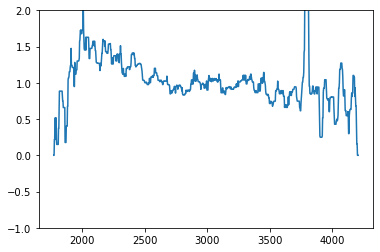

In [29]:

# plt.plot(x,y1)
plt.ylim(-1,2)
plt.plot(x,y3)

In [213]:
df=pd.read_csv('WHTfile_UPDATED.csv',header=0)
df1=pd.read_csv('errorfileWHT_UPDATED.csv')
DF=pd.merge(df,df1,left_on='name',right_on='name')

In [214]:
# DF.to_csv('WHTFILES.csv',header=-1)

J1255+0737.npy
2.145


/tmp/ipykernel_24162/3560402367.py:31: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


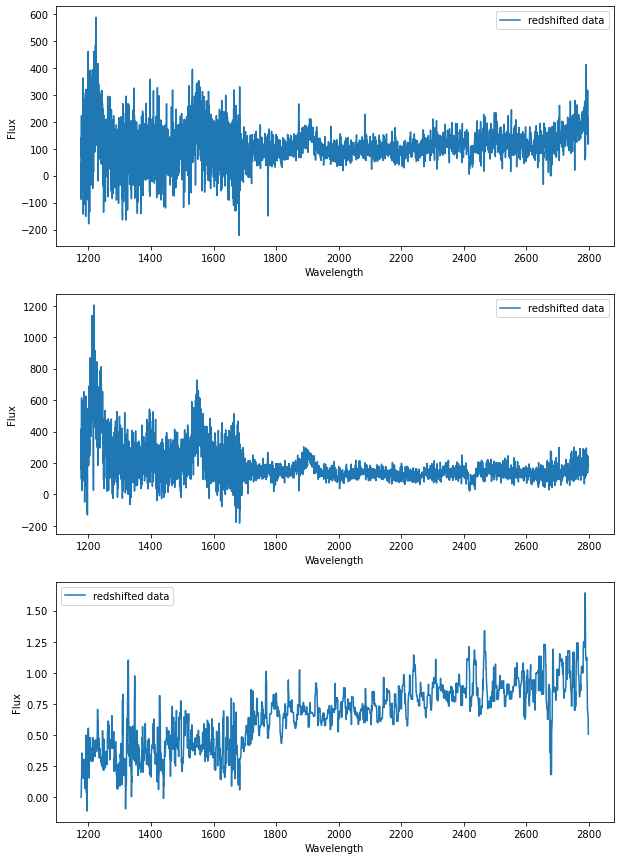

J1233-0227.npy
1.598


/tmp/ipykernel_24162/3560402367.py:31: RuntimeWarning: divide by zero encountered in true_divide
  y3=y1/y2


<Figure size 432x288 with 0 Axes>

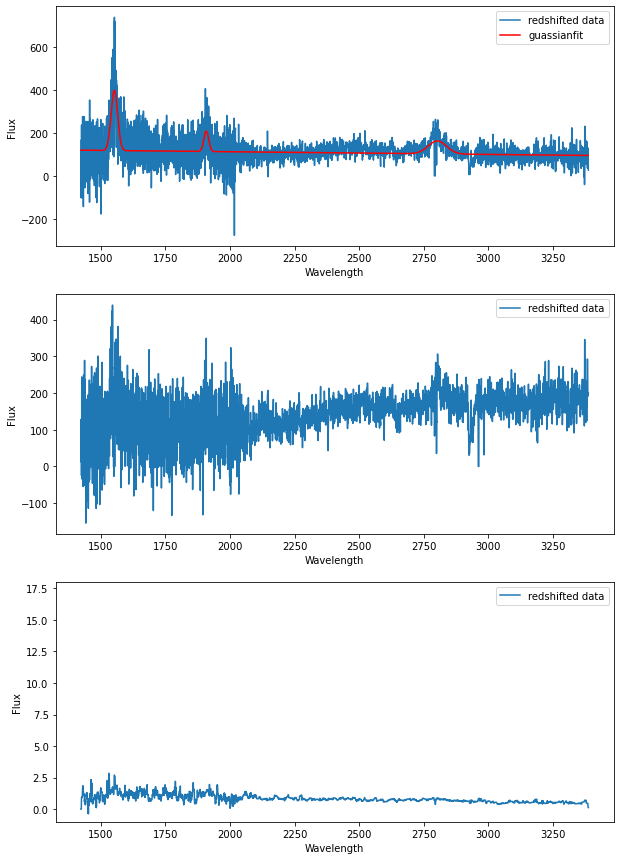

<Figure size 432x288 with 0 Axes>

In [185]:
DF=pd.read_csv('error.csv',header=0)
Spectra=DF.Spectra
z=DF.z
name=DF.Name
for i in range(0,len(DF)): 
    
    source=np.load(path+Spectra[i],allow_pickle=True)  
    print(Spectra[i])
    z=DF.z[i]
    print(z)
    wavelength=source[2]
    flux=source[0]
    bright_flux=flux1=flux[0]
    faint_flux=flux2=flux[1]
    fig, ax=plt.subplots(3,1,figsize=(10,15))
###BRIGHT SPECTRUM---------------------------------------------------------------------------------------
    x=wavelength
    pos=np.where((x >3700) & (x <8800)) 
    X=wavelength[pos]
    
    x=X/(z+1)
    y1=flux1[pos]
    x= np.nan_to_num(x)
    y1= np.nan_to_num(y1)        
    med1=statistics.median(y1) 
    y2=flux2[pos]
    x= np.nan_to_num(x)
    y2= np.nan_to_num(y2)
    med2=statistics.median(y2)
    
    y3=y1/y2
    
    y3=np.nan_to_num(y3,nan=np.nanmedian(y3))
    y3=medfilt(y3,13)
    med3=statistics.median(y3)
    
    if ((z>=2) and (z<=2.178)):
    
        p01=[med1,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1] #change this when : Optimal parameters not found:
                                             #Number of calls to function has reached maxfev = 1800.
#         popt1,pcov1= curve_fit(gauss4,x,y1,p0=p01,
#             bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0]
#             ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1915,50,np.inf,2815,50]])
        
#         perr1 = np.sqrt(np.diag(pcov1))
        
#         FWHM_LyA1=round(2*np.sqrt(2*np.log(2))*popt1[4])
#         FWHM_LyA1_err=round(2*np.log(2))*perr1[4]
#         FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[7])
#         FWHM_CIV1_err=round(2*np.log(2))*perr1[7]
#         FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[10])
#         FWHM_CIII1_err=round(2*np.log(2))*perr1[10]
#         FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[13])
#         FWHM_MgII1_err=round(2*np.log(2))*perr1[13]


#         LyA_low1=(popt1[0]+popt1[1]*popt1[3])
        
#         lyA_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+(popt1[1]*perr1[3])**2)
#         LyA_high1=(gauss4(popt1[3],*popt1)) 
#         LyA_high1_err=np.sqrt(perr1[0]**2+(1215*perr1[1])**2+perr1[2]**2)
#         LyA_dif1=LyA_high1-LyA_low1

#         CIV_low1=(popt1[0]+popt1[1]*popt1[6])
#         CIV_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+(popt1[1]*perr1[6])**2)
#         CIV_high1=(gauss4(popt1[6],*popt1))

#         CIV_high1_err=np.sqrt(perr1[0]**2+(1549*perr1[1])**2+perr1[5]**2)
#         CIV_dif1=CIV_high1-CIV_low1
        
#         CIII_low1=(popt1[0]+popt1[1]*popt1[9])
#         CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2+(popt1[1]*perr1[9])**2)
#         CIII_high1=(gauss4(popt1[9],*popt1)) 
        
        
#         CIII_high1_err=np.sqrt(perr1[0]**2+(1908*perr1[1])**2+perr1[8]**2)
        
#         CIII_dif1=CIII_high1-CIII_low1
    
#         MgII_low1=(popt1[0]+popt1[1]*popt1[12])
#         MgII_low1_err=np.sqrt(perr1[0]**2+(popt1[12]*perr1[1])**2+(popt1[1]*perr1[12])**2)
#         MgII_high1=(gauss4(popt1[12],*popt1)) 
        
              
#         MgII_high1_err=np.sqrt(perr1[0]**2+(2800*perr1[1])**2+perr1[11]**2)
        
        
#         MgII_dif1=MgII_high1-MgII_low1
               
          
        ax[0].plot(x,y1,label='redshifted data')
        #ax[0].plot(x, gauss4(x, *popt1),'r', label='guassianfit')
         
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
#         p02=[med2,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1] #change this when : Optimal parameters not found:
#                                                  #Number of calls to function has reached maxfev = 1800.
#         popt2,pcov2= curve_fit(gauss4,x,y2,p0=p02,
#         bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0]
#                  ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])
        
        
#         perr2 = np.sqrt(np.diag(pcov2))

#         FWHM_LyA2=round(2*np.sqrt(2*np.log(2))*popt2[4])
#         FWHM_LyA2_err=round(2*np.log(2))*perr2[4]
#         FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[7])
#         FWHM_CIV2_err=round(2*np.log(2))*perr2[7]
#         FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[10])
#         FWHM_CIII2=round(2*np.log(2))*perr2[10]
#         FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[13])
#         FWHM_MgII2_err=round(2*np.log(2))*perr2[13]

#         LyA_low2=(popt2[0]+popt2[1]*popt2[3])
#         lyA_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+(popt2[1]*perr2[3])**2)
#         LyA_high2=(gauss4(popt2[3],*popt2)) 
#         LyA_high2_err=np.sqrt(perr2[0]**2+(1215*perr2[1])**2+perr2[2]**2)
#         LyA_dif2=LyA_high2-LyA_low2


#         CIV_low2=(popt2[0]+popt2[1]*popt2[6])
#         CIV_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2+(popt2[1]*perr2[6])**2)
#         CIV_high2=(gauss4(popt2[6],*popt2))
#         CIV_high2_err=np.sqrt(perr2[0]**2+(1549*perr2[1])**2+perr2[5]**2)
#         CIV_dif2=CIV_high2-CIV_low2

    
#         CIII_low2=(popt2[0]+popt2[1]*popt2[9])
#         CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2+(popt2[1]*perr2[9])**2)
#         CIII_high2=(gauss4(popt2[9],*popt2))  
#         CIII_high2_err=np.sqrt(perr2[0]**2+(1908*perr2[1])**2+perr2[8]**2)
        
#         CIII_dif2=CIII_high2-CIII_low2

    
#         MgII_low2=(popt2[0]+popt2[1]*popt2[12])
#         MgII_low2_err=np.sqrt(perr2[0]**2+(popt2[12]*perr2[1])**2+(popt2[1]*perr2[12])**2)
#         MgII_high2=(gauss4(popt2[12],*popt2))
#         MgII_high2_err=np.sqrt(perr2[0]**2+(2800*perr2[1])**2+perr2[11]**2)
        
#         MgII_dif2=MgII_high2-MgII_low2
              
#         p03=[med3,1,10,1215,1,10,1549,1,10,1908,1,10,2800,1]
#         popt3,pcov3= curve_fit(gauss4,x,y3,p0=p03,
#         bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0]
#                  ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])
#         perr3 = np.sqrt(np.diag(pcov3))
        
#         FWHM_LyA3=round(2*np.sqrt(2*np.log(2))*popt3[4])
#         FWHM_LyA3_err=round(2*np.log(2))*perr3[4]
#         FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[7])
#         FWHM_CIV3_err=round(2*np.log(2))*perr3[7]
#         FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[10])
#         FWHM_CIII3_err=round(2*np.log(2))*perr3[10]
#         FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[13])
#         FWHM_MgII3_err=round(2*np.log(2))*perr3[13]


#         LyA_low3=(popt3[0]+popt3[1]*popt3[3])
#         LyA_low3_err=(LyA_low1/LyA_low2)*np.sqrt((LyA_low1_err/LyA_low1)**2+(LyA_low2_err/LyA_low2)**2)
#         LyA_high3=(gauss4(popt3[3],*popt3))
#         LyA_high3_err=(LyA_high1/LyA_high2)*np.sqrt((LyA_high1_err/LyA_high1)**2+(LyA_high2_err/LyA_high2)**2)
#         LyA_dif3=LyA_high3-LyA_low3
        
#         CIV_low3=(popt3[0]+popt3[1]*popt3[6])
#         CIV_low3_err=(CIV_low1/CIV_low2)*np.sqrt((CIV_low1_err/CIV_low1)**2+(CIV_low2_err/CIV_low2)**2)
#         CIV_high3=(gauss4(popt3[6],*popt3))
#         CIV_high3_err=(CIV_high1/CIV_high2)*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
#         CIV_dif3=CIV_high3-CIV_low3

    
#         CIII_low3=(popt3[0]+popt3[1]*popt3[9])
#         CIII_low3_err=(CIII_low1/CIII_low2)*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
#         CIII_high3=(gauss4(popt3[9],*popt3)) 
#         CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
        
#         CIII_dif3=CIII_high3-CIII_low3

    
#         MgII_low3=(popt3[0]+popt3[1]*popt3[12])
#         MgII_low3_err=(MgII_low1/MgII_low2)*np.sqrt((MgII_low1_err/MgII_low1)**2+(MgII_low2_err/MgII_low2)**2)
#         MgII_high3=(gauss4(popt3[12],*popt3))    
#         MgII_high3_err=(MgII_high1/MgII_high2)*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
#         MgII_dif3=MgII_high3-MgII_low3
            
#         value=[name[i],LyA_high1,LyA_high1_err,LyA_low1,LyA_low1_err,FWHM_LyA1,FWHM_LyA1_err,popt1[3],perr1[3],
#                LyA_high2,LyA_high2_err,LyA_low2,LyA_low2_err,FWHM_LyA2,FWHM_LyA2_err,popt2[3],perr2[3],
#                LyA_high3,LyA_high3_err,LyA_low3,LyA_low3_err,FWHM_LyA3,FWHM_LyA3_err,popt3[3],perr3[3],
#                CIV_high1,CIV_high1_err,CIV_low1,CIV_low1_err,FWHM_CIV1,FWHM_CIV1_err,popt1[6],perr1[6],
#                CIV_high2,CIV_high2_err,CIV_low2,CIV_low2_err,FWHM_CIV2,FWHM_CIV2_err,popt2[6],perr2[6],
#                CIV_high3,CIV_high3_err,CIV_low3,CIV_low3_err,FWHM_CIV3,FWHM_CIV3_err,popt3[6],perr3[6],
#                CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[9],perr1[9],
#                CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[9],perr2[9],
#                CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[9],perr3[9],
#                MgII_high1,MgII_high1_err,MgII_low1,MgII_low1_err,FWHM_MgII1,FWHM_MgII1_err,popt1[12],perr2[12],
#                MgII_high2,MgII_high2_err,MgII_low2,MgII_low2_err,FWHM_MgII2,FWHM_MgII2_err,popt2[12],perr2[12],
#                MgII_high3,MgII_high3_err,MgII_low3,MgII_low3_err,FWHM_MgII3,FWHM_MgII3_err,popt3[12],perr3[12]]
#         print(value)
        
#         error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
#                     'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
#                     'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
#                    'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
#                     'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
#                     'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
#                    'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
#                     'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
#                     'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
#         error=[name[i],perr1[0],perr1[1],perr1[2],perr1[3],perr1[4],perr1[5],perr1[6],perr1[7],perr1[8],
#                perr1[9],perr1[10],perr1[11],perr1[12],perr1[13],perr2[0],perr2[1],perr2[2],perr2[3],perr2[4],
#                perr2[5],perr2[6],perr2[7],perr2[8],perr2[9],perr2[10],perr2[11],perr2[12],perr2[13],perr3[0],
#                perr3[1],perr3[2],perr3[3],perr3[4],perr3[5],perr3[6],perr3[7],perr3[8],perr3[9],perr3[10],
#                perr3[11],perr3[12],perr3[13]]
        


        ax[1].plot(x,y2,label='redshifted data')
        #ax[1].plot(x, gauss4(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
                

        ax[2].plot(x,y3,label='redshifted data')
       # ax[2].plot(x, gauss4(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
               
        
        
    elif ((z>=1.42) and (z<=2.178)):
        p01=[med1,1,10,1549,1,10,1908,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss3,x,y1,p0=p01,
                               bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0],
                    [np.inf,np.inf,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])
        
        perr1 = np.sqrt(np.diag(pcov1))
        
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIV1_err=round(2*np.log(2))*perr1[4]
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIII1_err=round(2*np.log(2))*perr1[7]
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[10])
        FWHM_MgII1_err=round(2*np.log(2))*perr1[10]

        CIV_low1=(popt1[0]+popt1[1]*popt1[3])
        CIV_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+(popt1[1]*perr1[3])**2)
        CIV_high1=(gauss3(popt1[3],*popt1))
        CIV_high1_err=np.sqrt(perr1[0]**2+(1549*perr1[1])**2+perr1[2]**2)
        
        CIV_dif1=CIV_high1-CIV_low1

    
        CIII_low1=(popt1[0]+popt1[1]*popt1[6])
        CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+(popt1[1]*perr1[6])**2)
        CIII_high1=(gauss3(popt1[6],*popt1))  
        CIII_high1_err=np.sqrt(perr1[0]**2+(1908*perr1[1])**2+perr1[5]**2)
        CIII_dif1=CIII_high1-CIII_low1

    
        MgII_low1=(popt1[0]+popt1[1]*popt1[9])
        MgII_low1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2+(popt1[1]*perr1[9])**2)
        MgII_high1=(gauss3(popt1[9],*popt1))    
        MgII_high1_err=np.sqrt(perr1[0]**2+(2800*perr1[1])**2+perr1[8]**2)
        MgII_dif1=MgII_high1-MgII_low1
        
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss3(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1549,1,10,1908,1,10,2800,1]
#         popt2,pcov2= curve_fit(gauss3,x,y2,p0=p02,
#                                  bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0],
#                             [np.inf,np.inf,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])

#         perr2 = np.sqrt(np.diag(pcov2)) 
        
#         FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[4])
#         FWHM_CIV2_err=round(2*np.log(2))*perr2[4]
#         FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[7])
#         FWHM_CIII2_err=round(2*np.log(2))*perr2[7]
#         FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[10])
#         FWHM_MgII2_err=round(2*np.log(2))*perr2[10]


#         CIV_low2=(popt2[0]+popt2[1]*popt2[3])
#         CIV_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+(popt2[1]*perr2[3])**2)
#         CIV_high2=(gauss3(popt2[3],*popt2)) 
#         CIV_high2_err=np.sqrt(perr2[0]**2+(1549*perr2[1])**2+perr2[2]**2)
#         CIV_dif2=CIV_high2-CIV_low2

    
#         CIII_low2=(popt2[0]+popt2[1]*popt2[6])
#         CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2+(popt2[1]*perr2[6])**2)
#         CIII_high2=(gauss3(popt2[6],*popt2))  
#         CIII_high2_err=np.sqrt(perr2[0]**2+(1908*perr2[1])**2+perr2[5]**2)
#         CIII_dif2=CIII_high2-CIII_low2

    
#         MgII_low2=(popt2[0]+popt2[1]*popt2[9])
#         MgII_low2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2+(popt2[1]*perr2[9])**2)
#         MgII_high2=(gauss3(popt2[9],*popt2)) 
#         MgII_high2_err=np.sqrt(perr2[0]**2+(2800*perr2[1])**2+perr2[8]**2)
#         MgII_dif2=MgII_high2-MgII_low2

     
     
#         p03=[med3,1,10,1549,1,10,1908,1,10,2800,1]
#         popt3,pcov3= curve_fit(gauss3,x,y3,p0=p03,
#                                bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0,-np.inf,2785,0],
#                             [np.inf,np.inf,np.inf,1565,50,np.inf,1920,50,np.inf,2815,50]])

#         perr3 = np.sqrt(np.diag(pcov3))
        
#         FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[4])
#         FWHM_CIV3_err=round(2*np.log(2))*perr3[4]
#         FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[7])
#         FWHM_CIII3_err=round(2*np.log(2))*perr3[4]
#         FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[10])
#         FWHM_MgII3_err=round(2*np.log(2))*perr3[4]
        
#         CIV_low3=(popt3[0]+popt3[1]*popt3[3])
#         CIV_low3_err=(CIV_low1/CIV_low2)*np.sqrt((CIV_low1_err/CIV_low1)**2+(CIV_low2_err/CIV_low2)**2)
#         CIV_high3=(gauss3(popt3[3],*popt3))
#         CIV_high3_err=(CIV_high1/CIV_high2)*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
#         CIV_dif3=CIV_high3-CIV_low3

    
#         CIII_low3=(popt3[0]+popt3[1]*popt3[6])
#         CIII_low3_err=(CIII_low1/CIII_low2)*np.sqrt((CIII_low1_err/CIII_low1)**2+(CIII_low2_err/CIII_low2)**2)
#         CIII_high3=(gauss3(popt3[6],*popt3))    
#         CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
#         CIII_dif3=CIII_high3-CIII_low3
    
#         MgII_low3=(popt3[0]+popt3[1]*popt3[9])
#         MgII_low3_err=(MgII_low1/MgII_low2)*np.sqrt((MgII_low1_err/MgII_low1)**2+(MgII_low2_err/MgII_low2)**2)                                 
#         MgII_high3=(gauss3(popt3[9],*popt3))   
#         MgII_high3_err=(MgII_high1/MgII_high2)*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
#         MgII_dif3=MgII_high3-MgII_low3
         
     
#         value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
#                CIV_high1,CIV_high1_err,CIV_low1,CIV_low1_err,FWHM_CIV1,FWHM_CIV1_err,popt1[3],perr1[3],
#                CIV_high2,CIV_high2_err,CIV_low2,CIV_low2_err,FWHM_CIV2,FWHM_CIV2_err,popt2[3],perr2[3],
#                CIV_high3,CIV_high3_err,CIV_low3,CIV_low3_err,FWHM_CIV3,FWHM_CIV3_err,popt3[3],perr3[3],
#                CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[6],perr1[6],
#                CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[6],perr2[6],
#                CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[6],perr3[6],
#                MgII_high1,MgII_high1_err,MgII_low1,MgII_low1_err,FWHM_MgII1,FWHM_MgII1_err,popt1[9],perr2[9],
#                MgII_high2,MgII_high2_err,MgII_low2,MgII_low2_err,FWHM_MgII2,FWHM_MgII2_err,popt2[9],perr2[9],
#                MgII_high3,MgII_high3_err,MgII_low3,MgII_low3_err,FWHM_MgII3,FWHM_MgII3_err,popt3[9],perr3[9]]
#         print(value)
        
        
        
#         error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
#                     'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
#                     'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
#                    'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
#                     'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
#                     'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
#                    'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
#                     'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
#                     'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
#         error=[name[i],perr1[0],perr1[1],0,0,0,perr1[2],perr1[3],perr1[4],perr1[5],perr1[6],perr1[7],
#                perr1[8],perr1[9],perr1[10],perr2[0],perr2[1],0,0,0,perr2[2],perr2[3],perr2[4],perr2[5],
#                perr2[6],perr2[7],perr2[8],perr2[9],perr2[10],perr3[0],perr3[1],0,0,0,perr3[2],perr3[3],
#                perr3[4],perr3[5],perr3[6],perr3[7],perr3[8],perr3[9],perr3[10]]
        
        

        ax[1].plot(x,y2,label='redshifted data')
       # ax[1].plot(x, gauss3(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        

        ax[2].plot(x,y3,label='redshifted data')
       # ax[2].plot(x, gauss3(x, *popt3),'r', label='guassianfit')
        ax[2].set_ylim(-1,18)
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
        
        
        
    
    elif ((z>=2.092) and (z<=3.664)):
        p01=[med1,1,10,1215,1,10,1549,1,10,1908,1] 
        popt1,pcov1= curve_fit(gauss3,x,y1,p0=p01,
        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0],
                [np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1925,50]])
        
        perr1 = np.sqrt(np.diag(pcov1))
        
        FWHM_LyA1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_LyA1_err=round(2*np.log(2))*perr1[4]
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIV1_err=round(2*np.log(2))*perr1[7]
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[10])
        FWHM_CIII1_err=round(2*np.log(2))*perr1[10]


        LyA_low1=(popt1[0]+popt1[1]*popt1[3])
        LyA_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+(popt1[1]*perr1[3])**2)
        
        LyA_high1=(gauss3(popt1[3],*popt1))    
        LyA_high1_err=np.sqrt(perr1[0]**2+(1215*perr1[1])**2+perr1[2]**2)
        LyA_dif1=LyA_high1-LyA_low1



        CIV_low1=(popt1[0]+popt1[1]*popt1[6])
        CIV_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+(popt1[1]*perr1[6])**2)
        CIV_high1=(gauss3(popt1[6],*popt1)) 
        CIV_high1_err=np.sqrt(perr1[0]**2+(1549*perr1[1])**2+perr1[5]**2)
        CIV_dif1=CIV_high1-CIV_low1
        

    
        CIII_low1=(popt1[0]+popt1[1]*popt1[9])
        CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[9]*perr1[1])**2+(popt1[1]*perr1[9])**2)
        CIII_high1=(gauss3(popt1[9],*popt1))    
        CIII_high1_err=np.sqrt(perr1[0]**2+(1908*perr1[1])**2+perr1[8]**2)
        CIII_dif1=CIII_high1-CIII_low1



        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss3(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,1,10,1215,1,10,1549,1,10,1908,1]
        popt2,pcov2= curve_fit(gauss3,x,y2,p0=p02,
                        bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0]
                                    ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1925,50]])
        perr2 = np.sqrt(np.diag(pcov2)) 
        
        FWHM_LyA2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_LyA2_err=round(2*np.log(2))*perr2[4]
        
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIV2_err=round(2*np.log(2))*perr2[7]
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[10])
        FWHM_CIII2_err=round(2*np.log(2))*perr2[10]


        LyA_low2=(popt2[0]+popt2[1]*popt2[3])
        LyA_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+(popt2[1]*perr2[3])**2)
        LyA_high2=(gauss3(popt2[3],*popt2))  
        LyA_high2_err=np.sqrt(perr2[0]**2+(1215*perr2[1])**2+perr2[2]**2)
        LyA_dif2=LyA_high2-LyA_low2


        CIV_low2=(popt2[0]+popt2[1]*popt2[6])
        CIV_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2+(popt2[1]*perr2[6])**2)
        CIV_high2=(gauss3(popt2[6],*popt2))   
        CIV_high2_err=np.sqrt(perr2[0]**2+(1549*perr2[1])**2+perr2[5]**2)
        CIV_dif2=CIV_high2-CIV_low2

        
        CIII_low2=(popt2[0]+popt2[1]*popt2[9])
        CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[9]*perr2[1])**2+(popt2[1]*perr2[9])**2)
        CIII_high2=(gauss3(popt2[9],*popt2))    
        CIII_high2_err=np.sqrt(perr2[0]**2+(1908*perr2[1])**2+perr2[8]**2)
        CIII_dif2=CIII_high2-CIII_low2
        
        
        
        
#         p03=[med3,1,10,1215,1,10,1549,1,10,1908,1]
#         popt3,pcov3= curve_fit(gauss3,x,y3,p0=p03,
#                         bounds=[[-np.inf,-np.inf,-np.inf,1200,0,-np.inf,1535,0,-np.inf,1895,0]
#                                     ,[np.inf,np.inf,np.inf,1230,50,np.inf,1565,50,np.inf,1925,50]])

#         perr3 = np.sqrt(np.diag(pcov3))
            
#         FWHM_LyA3=round(2*np.sqrt(2*np.log(2))*popt3[4])
#         FWHM_LyA3_err=round(2*np.log(2))*perr3[4]
#         FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[7])
#         FWHM_CIV_err=round(2*np.log(2))*perr3[7]
#         FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[10])
#         FWHM_CIII_err=round(2*np.log(2))*perr3[10]
        


#         LyA_low3=(popt3[0]+popt3[1]*popt3[3])
#         LyA_low3_err=np.sqrt(perr3[0]**2+(popt3[3]*perr3[1])**2+(popt3[1]*perr3[3])**2)
#         LyA_high3=(gauss3(popt3[3],*popt3))    
#         LyA_high3_err=(LyA_high1/LyA_high2)*np.sqrt((LyA_high1_err/LyA_high1)**2+(LyA_high2_err/LyA_high2)**2)
#         LyA_dif3=LyA_high3-LyA_low3


#         CIV_low3=(popt3[0]+popt3[1]*popt3[6])
#         CIV_low3_err=np.sqrt(perr3[0]**2+(popt3[6]*perr3[1])**2+(popt3[1]*perr3[6])**2)
#         CIV_high3=(gauss3(popt3[6],*popt3))  
#         CIV_high3_err=(CIV_high1/CIV_high2)*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
#         CIV_dif3=CIV_high3-CIV_low3

#         CIII_low3=(popt3[0]+popt3[1]*popt3[9])
#         CIII_low3_err=np.sqrt(perr3[0]**2+(popt3[9]*perr3[1])**2+(popt3[1]*perr3[9])**2)
#         CIII_high3=(gauss3(popt3[9],*popt3)) 
#         CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
#         CIII_dif3=CIII_high3-CIII_low3
        

#         value=[name[i],LyA_high1,LyA_high1_err,LyA_low1,LyA_low1_err,FWHM_LyA1,FWHM_LyA1_err,popt1[3],perr1[3],
#                LyA_high2,LyA_high2_err,LyA_low2,LyA_low2_err,FWHM_LyA2,FWHM_LyA2_err,popt2[3],perr2[3],
#                LyA_high3,LyA_high3_err,LyA_low3,LyA_low3_err,FWHM_LyA3,FWHM_LyA3_err,popt3[3],perr3[3],
#                CIV_high1,CIV_high1_err,CIV_low1,CIV_low1_err,FWHM_CIV1,FWHM_CIV1_err,popt1[6],perr1[6],
#                CIV_high2,CIV_high2_err,CIV_low2,CIV_low2_err,FWHM_CIV2,FWHM_CIV2_err,popt2[6],perr2[6],
#                CIV_high3,CIV_high3_err,CIV_low3,CIV_low3_err,FWHM_CIV3,FWHM_CIV3_err,popt3[6],perr3[6],
#                CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[9],perr1[9],
#                CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[9],perr2[9],
#                CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[9],perr3[9],
#                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#         print(value)
        
#         error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
#                     'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
#                     'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
#                    'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
#                     'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
#                     'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
#                    'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
#                     'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
#                     'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
#         error=[name[i],perr1[0],perr1[1],perr1[2],perr1[3],perr1[4],perr1[5],perr1[6],perr1[7],
#                perr1[8],perr1[9],perr1[10],0,0,0,perr2[0],perr2[1],perr2[2],perr2[3],perr2[4],perr2[5],
#                perr2[6],perr2[7],perr2[8],perr2[9],perr2[10],0,0,0,perr3[0],perr3[1],perr3[2],perr3[3],
#                perr3[4],perr3[5],perr3[6],perr3[7],perr3[8],perr3[9],perr3[10],0,0,0]
        
    
        
        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss3(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        
        


        ax[2].plot(x,y3,label='redshifted data')
        #ax[2].plot(x, gauss3(x, *popt3),'r', label='guassianfit')
        ax[2].set_ylim(-1,2.5)
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
        
    elif ((z>=0.9) and (z<=2.178)):
        p01=[med1,1,10,1908,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss2,x,y1,p0=p01,bounds=[[-np.inf,-np.inf,-np.inf,1895,0,-np.inf,2785,0],
                        [np.inf,np.inf,np.inf,1920,50,np.inf,2815,50]])
        perr1 = np.sqrt(np.diag(pcov1))
        
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIII1_err=round(2*np.log(2))*perr1[4]
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_MgII1_err=round(2*np.log(2))*perr1[7]


        CIII_low1=(popt1[0]+popt1[1]*popt1[3])
        CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+(popt1[1]*perr1[3])**2)
        CIII_high1=(gauss2(popt1[3],*popt1))    
        CIII_high1_err=np.sqrt(perr1[0]**2+(1908*perr1[1])**2+perr1[2]**2)
        CIII_dif1=CIII_high1-CIII_low1


        MgII_low1=(popt1[0]+popt1[1]*popt1[6])
        MgII_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+(popt1[1]*perr1[6])**2)
        MgII_high1=(gauss2(popt1[6],*popt1))  
        MgII_high1_err=np.sqrt(perr1[0]**2+(2800*perr1[1])**2+perr1[5]**2)
        MgII_dif1=MgII_high1-MgII_low1
        

        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss2(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        p02=[med2,0,10,1908,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss2,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,1895,0,-np.inf,2785,0]
                                                         ,[np.inf,np.inf,np.inf,1920,50,np.inf,2815,50]])
                
        perr2 = np.sqrt(np.diag(pcov2))
        
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIII2_err=round(2*np.log(2))*perr2[4]
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_MgII2_err=round(2*np.log(2))*perr2[7]

        CIII_low2=(popt2[0]+popt2[1]*popt2[3])
        CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+(popt2[1]*perr2[3])**2)
        CIII_high2=(gauss2(popt2[3],*popt2))  
        CIII_high2_err=np.sqrt(perr2[0]**2+(1908*perr2[1])**2+perr2[2]**2)
        CIII_dif2=CIII_high2-CIII_low2

        MgII_low2=(popt2[0]+popt2[1]*popt2[6])
        MgII_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[6])**2+(popt2[1]*perr2[6])**2)
        MgII_high2=(gauss2(popt2[6],*popt2))    
        MgII_high2_err=np.sqrt(perr2[0]**2+(2800*perr2[1])**2+perr2[5]**2)

        MgII_dif2=MgII_high2-MgII_low2
                
        
#         p03=[med3,0,10,1908,1,10,2800,1]
#         popt3,pcov3= curve_fit(gauss2,x,y3,p0=p03,bounds=[[-np.inf,-np.inf,-np.inf,1895,0,-np.inf,2785,0]
#                                                          ,[np.inf,np.inf,np.inf,1920,300,np.inf,2815,300]])
                
#         perr3 = np.sqrt(np.diag(pcov3))
        
#         FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[4])
#         FWHM_CIII3_err=round(2*np.log(2))*perr3[4]
#         FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[7])
#         FWHM_MgII3_err=round(2*np.log(2))*perr3[7]


#         CIII_low3=(popt3[0]+popt3[1]*popt3[3])
#         CIII_low3_err=np.sqrt(perr3[0]**2+(popt3[3]*perr3[1])**2+(popt3[1]*perr3[3])**2)
#         CIII_high3=(gauss2(popt3[3],*popt3))
#         CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
#         CIII_dif3=CIII_high3-CIII_low3

#         MgII_low3=(popt3[0]+popt3[1]*popt3[6])
#         MgII_low3_err=np.sqrt(perr3[0]**2+(popt3[6]*perr3[1])**2+(popt3[1]*perr3[6])**2)
#         MgII_high3=(gauss2(popt3[6],*popt3)) 
#         MgII_high3_err=(MgII_high1/MgII_high2)*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
#         MgII_dif3=MgII_high3-MgII_low3
       
  
#         value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
#                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
#                CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[3],perr1[3],
#                CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[3],perr2[3],
#                CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[3],perr3[3],
#                MgII_high1,MgII_high1_err,MgII_low1,MgII_low1_err,FWHM_MgII1,FWHM_MgII1_err,popt1[6],perr2[6],
#                MgII_high2,MgII_high2_err,MgII_low2,MgII_low2_err,FWHM_MgII2,FWHM_MgII2_err,popt2[6],perr2[6],
#                MgII_high3,MgII_high3_err,MgII_low3,MgII_low3_err,FWHM_MgII3,FWHM_MgII3_err,popt3[6],perr3[6]]
#         print(value)
                
#         error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
#                     'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
#                     'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
#                    'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
#                     'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
#                     'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
#                    'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
#                     'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
#                     'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
#         error=[name[i],perr1[0],perr1[1],0,0,0,0,0,0,perr1[2],perr1[3],perr1[4],perr1[5],perr1[6],perr1[7],
#                perr2[0],perr2[1],0,0,0,0,0,0,perr2[2],perr2[3],perr2[4],perr2[5],perr2[6],perr2[7],
#                perr3[0],perr3[1],0,0,0,0,0,0,perr3[2],perr3[3],perr3[4],perr3[5],perr3[6],perr3[7]]     

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss2(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
                

        ax[2].plot(x,y3,label='redshifted data')
      #  ax[2].plot(x, gauss2(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux') 
        ax[2].set_ylim(-1,2)
        ax[2].legend()
        
                       
    elif ((z>=1.42) and (z<=3.6)):
        p01=[med1,1,10,1549,1,10,1908,1]
        popt1,pcov1= curve_fit(gauss2,x,y1,p0=p01,bounds=[[-np.inf,np.inf,-np.inf,1535,0,np.inf,1895,0]
                        ,[np.inf,np.inf,np.inf,1565,50,np.inf,np.inf,1925,50]])
        perr1 = np.sqrt(np.diag(pcov1))
        
        FWHM_CIV1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_CIV1_err=round(2*np.log(2))*perr1[4]
        FWHM_CIII1=round(2*np.sqrt(2*np.log(2))*popt1[7])
        FWHM_CIII1_err=round(2*np.log(2))*perr1[7]

        CIV_low1=(popt1[0]+popt1[1]*popt1[3])
        CIV_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+(popt1[1]*perr1[3])**2)
        CIV_high1=(gauss2(popt1[3],*popt1))  
        CIV_high1_err=np.sqrt(perr1[0]**2+(1549*perr1[1])**2+perr1[2]**2)
        CIV_dif1=CIV_high1-CIV_low1


        CIII_low1=(popt1[0]+popt1[1]*popt1[6])
        CIII_low1_err=np.sqrt(perr1[0]**2+(popt1[6]*perr1[1])**2+(popt1[1]*perr1[6])**2)
        CIII_high1=(gauss2(popt1[6],*popt1))    
        CIII_high1_err=np.sqrt(perr1[0]**2+(1908*perr1[1])**2+perr1[5]**2)
        CIII_dif1=CIII_high1-CIII_low1  

        
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss2(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()
        
        p02=[med2,0,10,1549,1,10,1908,1]
        popt2,pcov2= curve_fit(gauss2,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0],
                                                         [np.inf,np.inf,np.inf,1565,50,np.inf,np.inf,1925,50]])
        perr2 = np.sqrt(np.diag(pcov2))
        FWHM_CIV2=round(2*np.sqrt(2*np.log(2))*popt2[4])
        FWHM_CIV2_err=round(2*np.log(2))*perr2[4]
        FWHM_CIII2=round(2*np.sqrt(2*np.log(2))*popt2[7])
        FWHM_CIII2_err=round(2*np.log(2))*perr2[7]

        
        CIV_low2=(popt2[0]+popt2[1]*popt2[3])
        CIV_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+(popt2[1]*perr2[3])**2)
        CIV_high2=(gauss2(popt2[3],*popt2)) 
        CIV_high2_err=np.sqrt(perr2[0]**2+(1549*perr2[1])**2+perr2[2]**2)
        CIV_dif2=CIV_high2-CIV_low2


        CIII_low2=(popt2[0]+popt2[1]*popt2[6])
        CIII_low2_err=np.sqrt(perr2[0]**2+(popt2[6]*perr2[1])**2+(popt2[1]*perr2[6])**2)
        CIII_high2=(gauss2(popt2[6],*popt2))  
        CIII_high2_err=np.sqrt(perr2[0]**2+(1908*perr2[1])**2+perr2[5]**2)
        CIII_dif2=CIII_high2-CIII_low2
              
        
#         p03=[med3,0,10,1549,1,10,1908,1]
#         popt3,pcov3= curve_fit(gauss2,x,y3,p0=p03,bounds=[[-np.inf,-np.inf,-np.inf,1535,0,-np.inf,1895,0],
#                                                          [np.inf,np.inf,np.inf,1565,50,np.inf,np.inf,1925,50]])
#         perr3 = np.sqrt(np.diag(pcov3))
        
#         FWHM_CIV3=round(2*np.sqrt(2*np.log(2))*popt3[4])
#         FWHM_CIV3_err=round(2*np.log(2))*perr3[4]
#         FWHM_CIII3=round(2*np.sqrt(2*np.log(2))*popt3[7])
#         FWHM_CIII3_err=round(2*np.log(2))*perr3[7]


#         CIV_low3=(popt3[0]+popt3[1]*popt3[3])
#         CIV_low3_err=np.sqrt(perr3[0]**2+(popt3[3]*perr3[1])**2+(popt3[1]*perr3[3])**2)
#         CIV_high3=(gauss2(popt3[3],*popt3))    
#         CIV_high3_err=(CIV_high1/CIV_high2)*np.sqrt((CIV_high1_err/CIV_high1)**2+(CIV_high2_err/CIV_high2)**2)
#         CIV_dif3=CIV_high3-CIV_low3


#         CIII_low3=(popt3[0]+popt3[1]*popt3[6])
#         CIII_low3_err=np.sqrt(perr3[0]**2+(popt3[6]*perr3[1])**2+(popt3[1]*perr3[6])**2)
#         CIII_high3=(gauss2(popt3[6],*popt3)) 
#         CIII_high3_err=(CIII_high1/CIII_high2)*np.sqrt((CIII_high1_err/CIII_high1)**2+(CIII_high2_err/CIII_high2)**2)
#         CIII_dif3=CIII_high3-CIII_low3
               

#         value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
#                CIV_high1,CIV_high1_err,CIV_low1,CIV_low1_err,FWHM_CIV1,FWHM_CIV1_err,popt1[3],perr1[3],
#                CIV_high2,CIV_high2_err,CIV_low2,CIV_low2_err,FWHM_CIV2,FWHM_CIV2_err,popt2[3],perr2[3],
#                CIV_high3,CIV_high3_err,CIV_low3,CIV_low3_err,FWHM_CIV3,FWHM_CIV3_err,popt3[3],perr3[3],
#                CIII_high1,CIII_high1_err,CIII_low1,CIII_low1_err,FWHM_CIII1,FWHM_CIII1_err,popt1[6],perr1[6],
#                CIII_high2,CIII_high2_err,CIII_low2,CIII_low2_err,FWHM_CIII2,FWHM_CIII2_err,popt2[6],perr2[6],
#                CIII_high3,CIII_high3_err,CIII_low3,CIII_low3_err,FWHM_CIII3,FWHM_CIII3_err,popt3[6],perr3[6],
#                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]
#         print(value)
        
#         error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
#                     'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
#                     'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
#                    'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
#                     'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
#                     'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
#                    'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
#                     'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
#                     'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
#         error=[name[i],perr1[0],perr1[1],0,0,0,perr1[2],perr1[3],perr1[4],perr1[5],perr1[6],perr1[7],
#                0,0,0,perr2[0],perr2[1],0,0,0,perr2[2],perr2[3],perr2[4],perr2[5],
#                perr2[6],perr2[7],0,0,0,perr3[0],perr3[1],0,0,0,perr3[2],perr3[3],
#                perr3[4],perr3[5],perr3[6],perr3[7],0,0,0]
                

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss2(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
        

        ax[2].plot(x,y3,label='redshifted data')
       # ax[2].plot(x, gauss2(x, *popt3),'r', label='guassianfit')
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
    
    elif ((z>=0.34) and (z<=2.178)):
        p01=[med1,1,10,2800,1]
        popt1,pcov1= curve_fit(gauss1,x,y1,p0=p01,bounds=[[-np.inf,-np.inf,-np.inf,2785,0],
                                                         [np.inf,np.inf,np.inf,2815,50]])
        perr1 = np.sqrt(np.diag(pcov1))
          
        FWHM_MgII1=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_MgII1_err=round(2*np.log(2))*perr1[4]

        MgII_low1=(popt1[0]+popt1[1]*popt1[3])
        MgII_low1_err=np.sqrt(perr1[0]**2+(popt1[3]*perr1[1])**2+(popt1[1]*perr1[3])**2)
        MgII_high1=(gauss1(popt1[3],*popt1))  
        MgII_high1_err=np.sqrt(perr1[0]**2+(2800*perr1[1])**2+perr1[2]**2)
        MgII_dif1=MgII_high1-MgII_low1

        
        ax[0].plot(x,y1,label='redshifted data')
        ax[0].plot(x, gauss1(x, *popt1),'r', label='guassianfit')
        ax[0].set_xlabel('Wavelength')
        ax[0].set_ylabel('Flux')       
        ax[0].legend()  
        p02=[med2,1,10,2800,1]
        popt2,pcov2= curve_fit(gauss1,x,y2,p0=p02,bounds=[[-np.inf,-np.inf,-np.inf,2785,0],
                                                         [np.inf,np.inf,np.inf,2815,50]])
        perr2 = np.sqrt(np.diag(pcov2))    
          
        FWHM_MgII2=round(2*np.sqrt(2*np.log(2))*popt1[4])
        FWHM_MgII2_err=perr2[4]

        MgII_low2=(popt2[0]+popt2[1]*popt2[3])
        MgII_low2_err=np.sqrt(perr2[0]**2+(popt2[3]*perr2[1])**2+(popt2[1]*perr2[3])**2)
        MgII_high2=(gauss1(popt2[3],*popt2))   
        MgII_high2_err=np.sqrt(perr2[0]**2+(2800*perr2[1])**2+perr2[2]**2)
        MgII_dif2=MgII_high2-MgII_low2
               
#         p03=[med3,1,10,2800,1]
#         popt3,pcov3= curve_fit(gauss1,x,y3,p0=p03,bounds=[[-np.inf,-np.inf,-np.inf,2785,0],
#                                                          [np.inf,np.inf,np.inf,2815,50]])
#         perr3 = np.sqrt(np.diag(pcov3))   
          
#         FWHM_MgII3=round(2*np.sqrt(2*np.log(2))*popt3[4])
#         FWHM_MgII3_err=round(2*np.log(2))*perr3[4]
       
#         MgII_low3=(popt3[0]+popt3[1]*popt3[3])
#         MgII_low3_err=np.sqrt(perr3[0]**2+(popt3[3]*perr3[1])**2+(popt3[1]*perr3[3])**2)
#         MgII_high3=(gauss1(popt3[3],*popt3)) 
#         MgII_high3_err=(MgII_high1/MgII_high2)*np.sqrt((MgII_high1_err/MgII_high1)**2+(MgII_high2_err/MgII_high2)**2)
#         MgII_dif3=MgII_high3-MgII_low3          

#         value=[name[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
#                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
#                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
#                 MgII_high1,MgII_high1_err,MgII_low1,MgII_low1_err,FWHM_MgII1,FWHM_MgII1_err,popt1[3],perr2[3],
#                MgII_high2,MgII_high2_err,MgII_low2,MgII_low2_err,FWHM_MgII2,FWHM_MgII2_err,popt2[3],perr2[3],
#                MgII_high3,MgII_high3_err,MgII_low3,MgII_low3_err,FWHM_MgII3,FWHM_MgII3_err,popt3[3],perr3[3]]
#         print(value)
                
#         error_name=['name','median_err_b','slope_err_b','amp_err_LyA_b','cen_err_LyA_b','sig_err_LyA_b',
#                     'amp_err_CIV_b','cen_err_CIV_b','sig_err_CIV_b','amp_err_CIII_b','cen_err_CIII_b',
#                     'sig_err_CIII_b','amp_err_MgII_b','cen_err_MgII_b','sig_err_MgII_b',
#                    'median_err_f','slope_err_f','amp_err_LyA_f','cen_err_LyA_f','sig_err_LyA_f',
#                     'amp_err_CIV_f','cen_err_CIV_f','sig_err_CIV_f','amp_err_CIII_f','cen_err_CIII_f',
#                     'sig_err_CIII_f','amp_err_MgII_f','cen_err_MgII_f','sig_err_MgII_f',
#                    'median_err_r','slope_err_r','amp_err_LyA_r','cen_err_LyA_r','sig_err_LyA_r',
#                     'amp_err_CIV_r','cen_err_CIV_r','sig_err_CIV_r','amp_err_CIII_r','cen_err_CIII_r',
#                     'sig_err_CIII_r','amp_err_MgII_r','cen_err_MgII_r','sig_err_MgII_r']
        
#         error=[name[i],perr1[0],perr1[1],0,0,0,0,0,0,0,0,0,perr1[2],perr1[3],perr1[4],
#                perr2[0],perr2[1],0,0,0,0,0,0,0,0,0,perr2[2],perr2[3],perr2[4],
#                perr3[0],perr3[1],0,0,0,0,0,0,0,0,0,perr3[2],perr3[3],perr3[4]]

        ax[1].plot(x,y2,label='redshifted data')
        ax[1].plot(x, gauss1(x, *popt2),'r', label='guassianfit')
        ax[1].set_xlabel('Wavelength')
        ax[1].set_ylabel('Flux')       
        ax[1].legend()
       
        ax[2].plot(x,y3,label='redshifted data')
        #ax[2].plot(x, gauss1(x, *popt3),'r', label='guassianfit')
        ax[2].set_ylim(-1,4)
        ax[2].set_xlabel('Wavelength')
        ax[2].set_ylabel('Flux')       
        ax[2].legend()
            
    with open('whtfile.csv', 'a', newline='',) as f_object:
        writer_object = csv.writer(f_object)
        writer_object.writerow(value)  
        f_object.close()
#     with open('errorfile.csv', 'a', newline='',) as f_object:
#         writer_object = csv.writer(f_object)
#         writer_object.writerow(error)  
#         f_object.close()

    plt.savefig(path+name[i]+'.png')
    plt.show()
    plt.clf()

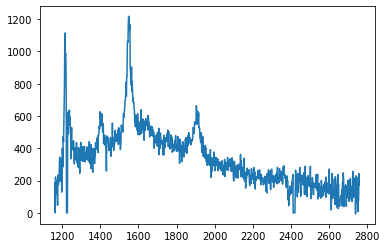

In [141]:
plt.plot(x,y2)

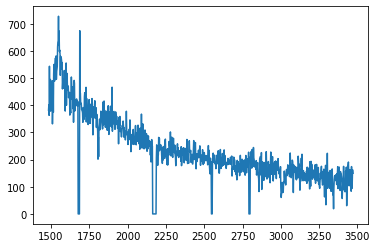

In [83]:
plt.plot(x,y2)
plt.show()

In [ ]:
def sd_calc(data):
    n = len(data)

    if n <= 1:
        return 0.0

    mean, sd = avg_calc(data), 0.0

    # calculate stan. dev.
    for el in data:
        sd += (float(el) - mean)**2
    sd = math.sqrt(sd / float(n-1))
    return sd
def avg_calc(ls):
    n, mean = len(ls), 0.0

    if n <= 1:
        return ls[0]

    # calculate average
    for el in ls:
        mean = mean + float(el)
    mean = mean / float(n)

    return mean


42